# 1. Data Loading and Preprocessing

In [327]:
%pip install prettytable
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install scipy
%pip install seaborn
%pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from prettytable import PrettyTable



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note

In [231]:
import pandas as pd
import json

def load_data(file_path):
    # JSON Lines dosyasını oku
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    
    # DataFrame oluştur
    df = pd.DataFrame(data)
    
    # 'properties' alanını düzleştir
    def flatten_properties(props):
        return {item['key']: item['value'].get('string_value') or item['value'].get('float_value') for item in props}
    
    properties_df = pd.DataFrame([flatten_properties(props) for props in df['properties']])
    
    # Ana DataFrame ile birleştir
    df = pd.concat([df.drop('properties', axis=1), properties_df], axis=1)
    
    # Tarih sütunlarını dönüştür
    df['event_time'] = pd.to_datetime(pd.to_numeric(df['event_time']), unit='ms')
    df['first_event_time'] = pd.to_datetime(pd.to_numeric(df['first_event_time']), unit='ms')
    
    # 'revenue' sütununu sayısal değere dönüştür
    df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
    
    # Ek hesaplamalar
    df['days_since_first_event'] = (df['event_time'] - df['first_event_time']).dt.total_seconds() / (24 * 60 * 60)
    
    return df


In [232]:
# Veriyi yükle
df = load_data('data/dataset_experiment.json')

# Veri hakkında genel bilgi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23772 entries, 0 to 23771
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   experiment_variant      23772 non-null  object        
 1   event_name              23772 non-null  object        
 2   user_id                 23772 non-null  object        
 3   first_event_time        23772 non-null  datetime64[ns]
 4   event_time              23772 non-null  datetime64[ns]
 5   productDuration         23772 non-null  object        
 6   revenue                 23772 non-null  float64       
 7   baseCurrency            23772 non-null  object        
 8   days_since_first_event  23772 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 1.6+ MB
None


In [233]:
df.head()

,experiment_variant,event_name,user_id,first_event_time,event_time,productDuration,revenue,baseCurrency,days_since_first_event
0,A,auto_renew_off,14572B89,2022-10-22 01:57:15.450,2022-11-05 03:47:44.453,1 Week,0.0,USD,14.076725
1,A,subscribe,20BCF1FB,2022-10-10 15:14:36.179,2022-12-08 07:17:02.250,1 Week,0.0,USD,58.668357
2,B,subscribe,7BEB89DB,2022-10-11 14:05:34.274,2022-11-30 12:53:04.631,12 Month,0.0,USD,49.949657
3,A,subscribe,8AE2E880,2022-10-17 15:26:09.519,2022-11-24 07:31:02.006,1 Week,0.0,USD,37.670052
4,A,subscribe,B55EAC7E,2022-10-18 09:13:36.634,2022-11-04 01:15:19.056,1 Week,0.0,USD,16.667852


In [234]:
# Temel istatistikler
df.describe()

,first_event_time,event_time,revenue,days_since_first_event
count,23772,23772,23772.000000,23772.000000
mean,2022-10-13 11:47:47.565156096,2022-11-05 01:10:44.475585280,7.374048,22.557603
min,2022-10-02 11:18:44.091000,2022-10-02 21:44:50.797000,-33.990000,0.000012
25%,2022-10-09 14:30:55.005499904,2022-10-16 21:45:09.952250112,4.890000,2.667292
50%,2022-10-12 20:48:48.086000128,2022-10-28 10:40:24.197999872,4.890000,16.070037
75%,2022-10-18 00:51:03.799000064,2022-11-22 15:24:00.545499904,4.890000,38.308671
max,2022-10-22 08:01:15.320000,2022-12-30 23:11:44.618000,33.990000,76.999361
std,NaN,NaN,6.750340,23.000466


In [235]:
# Benzersiz olay türleri
df['event_name'].value_counts()

event_name
subscribe         16465
auto_renew_off     7192
refund              115
Name: count, dtype: int64

In [236]:
# Şimdi duplicate'leri kaldırabiliriz
df = df.drop_duplicates()

print("\nDuplicate'ler kaldırıldıktan sonra veri seti boyutu:", df.shape)


Duplicate'ler kaldırıldıktan sonra veri seti boyutu: (23770, 9)


# 2. Experiment Setup Analysis

In [237]:
# Calculate experiment duration
experiment_duration = (df['first_event_time'].max() - df['first_event_time'].min()).days
print(f"Experiment duration: {experiment_duration} days")

Experiment duration: 19 days


In [238]:
# Analyze distribution of variants
variant_counts = df['experiment_variant'].value_counts()
print("\nDistribution of experiment variants:")
print(variant_counts)


Distribution of experiment variants:
experiment_variant
A    12628
B    11142
Name: count, dtype: int64


## 2.2 Visualize Variant Distribution

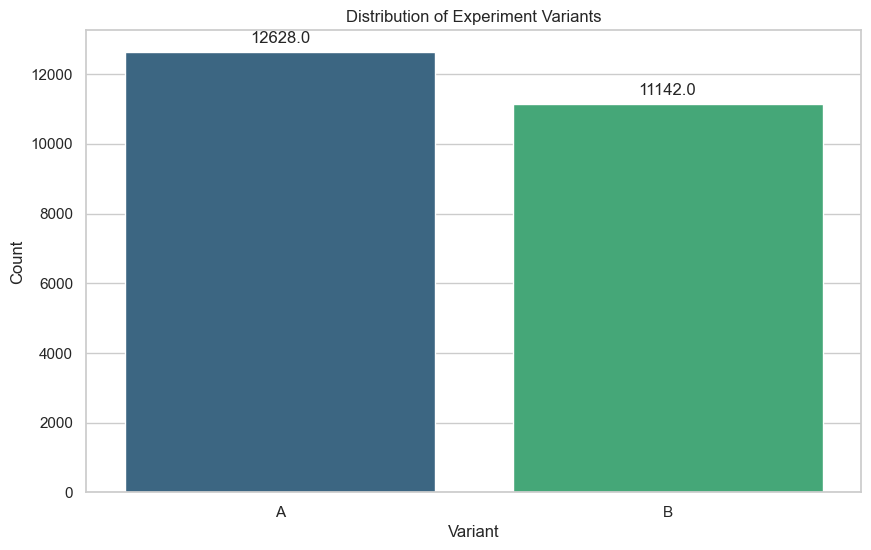

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize variant distribution with value labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='experiment_variant', data=df, hue='experiment_variant', palette='viridis', legend=False)
plt.title('Distribution of Experiment Variants')
plt.xlabel('Variant')
plt.ylabel('Count')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [240]:
import scipy.stats as stats

# Perform Chi-square test for equal distribution
chi2, p_value = stats.chisquare(variant_counts)
print(f"\nChi-square test for equal distribution: p-value = {p_value:.4f}")



Chi-square test for equal distribution: p-value = 0.0000


## 2.3 Hypothesis test

In [241]:
# Hypothesis test
alpha = 0.05
print("\nNull Hypothesis: The distribution of users between variants A and B is equal.")
print(f"Alternative Hypothesis: The distribution of users between variants A and B is not equal.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: The distribution of users between variants A and B is equal.
Alternative Hypothesis: The distribution of users between variants A and B is not equal.
Result: Reject the null hypothesis (p-value: 0.0000, α: 0.05)


## 2.4 User Acquisition Distribution Over Time

Data type of 'first_event_time': datetime64[ns]


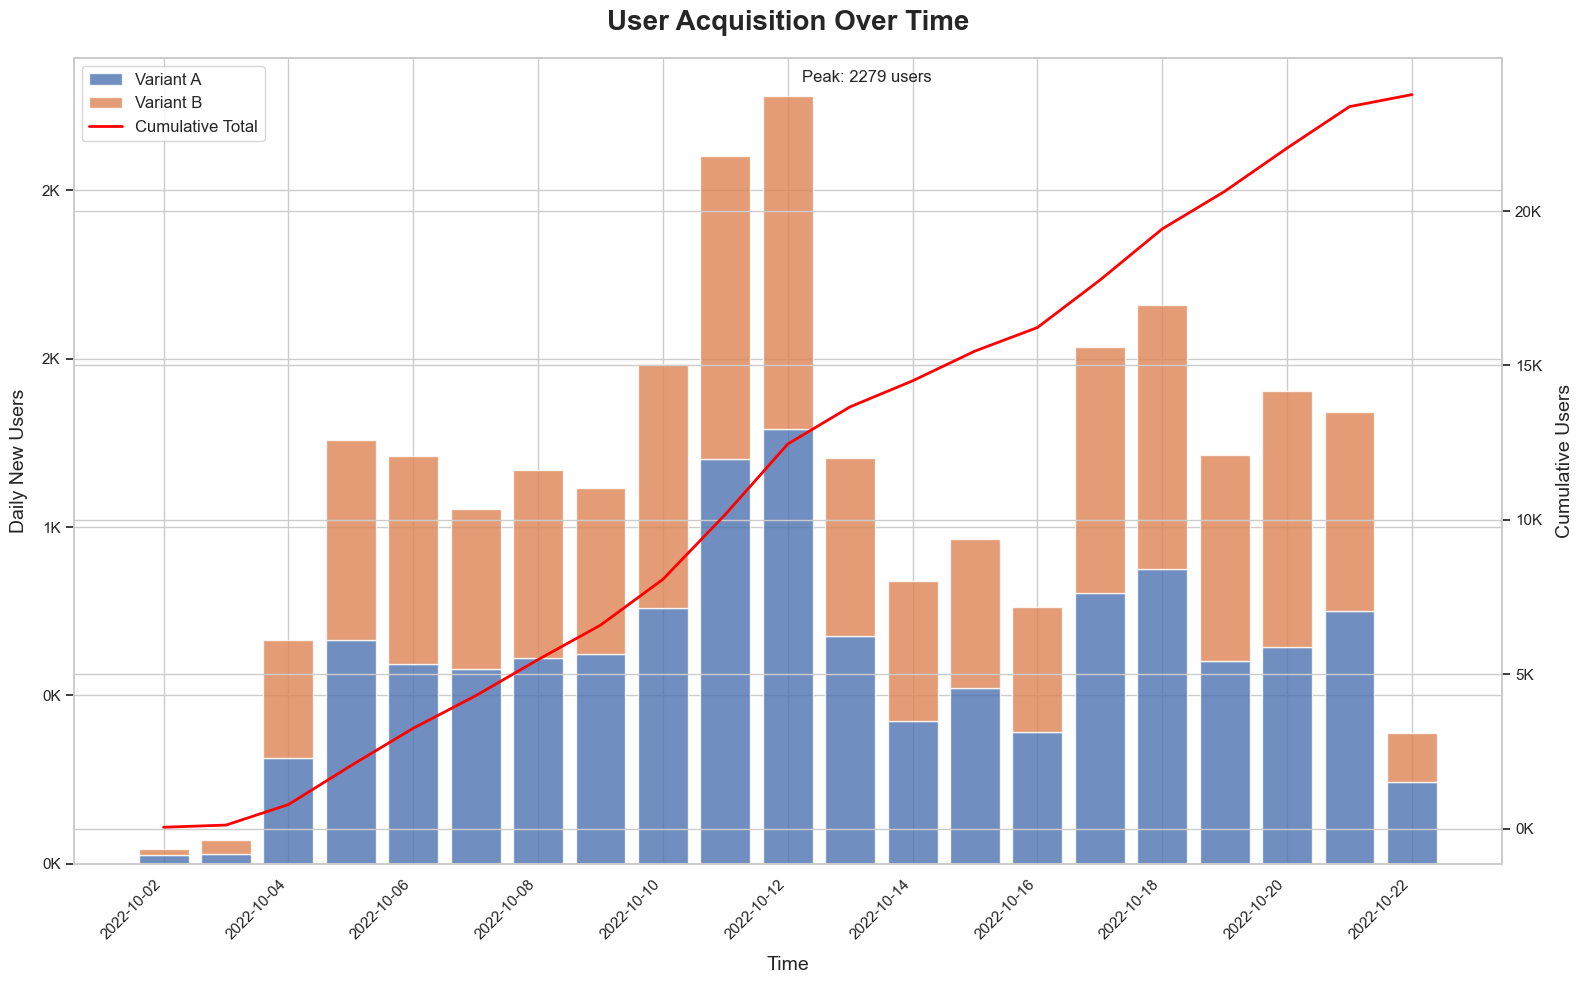


Total number of days: 21
Total users: 23770
Peak daily users: 2279 on 2022-10-12


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Check the data type of 'first_event_time'
print(f"Data type of 'first_event_time': {df['first_event_time'].dtype}")

# Try to convert 'first_event_time' to datetime
try:
    df['first_event_time'] = pd.to_datetime(df['first_event_time'], errors='coerce')
except:
    print("Failed to convert 'first_event_time' to datetime.")

# Prepare the data
if pd.api.types.is_datetime64_any_dtype(df['first_event_time']):
    df_daily = df.groupby([df['first_event_time'].dt.date, 'experiment_variant']).size().unstack(fill_value=0).reset_index()
else:
    df_daily = df.groupby(['first_event_time', 'experiment_variant']).size().unstack(fill_value=0).reset_index()

df_daily['Total'] = df_daily['A'] + df_daily['B']
df_daily['Cumulative_Total'] = df_daily['Total'].cumsum()

# Set up the plot
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the main axis for the bar plot
ax1 = plt.gca()

# Create the stacked bar plot using matplotlib
x = range(len(df_daily))
ax1.bar(x, df_daily['A'], label='Variant A', alpha=0.8)
ax1.bar(x, df_daily['B'], bottom=df_daily['A'], label='Variant B', alpha=0.8)

# Create a secondary axis for the cumulative line
ax2 = ax1.twinx()

# Plot the cumulative line
ax2.plot(x, df_daily['Cumulative_Total'], color='red', linewidth=2, label='Cumulative Total')

# Customize the plot
ax1.set_title('User Acquisition Over Time', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('Time', fontsize=14, labelpad=10)
ax1.set_ylabel('Daily New Users', fontsize=14, labelpad=10)
ax2.set_ylabel('Cumulative Users', fontsize=14, labelpad=10)

# Format y-axis labels to show thousands
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}K'

ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Set x-axis ticks and labels
num_ticks = 10
step = max(len(x) // num_ticks, 1)
ax1.set_xticks(x[::step])
ax1.set_xticklabels(df_daily['first_event_time'][::step], rotation=45, ha='right')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Add annotations for key events or trends
max_day_index = df_daily['Total'].idxmax()
max_users = df_daily['Total'].max()
ax1.annotate(f'Peak: {max_users} users', 
             xy=(max_day_index, max_users), 
             xytext=(10, 10), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.tight_layout()
plt.show()

# Print some information about the data
print(f"\nTotal number of days: {len(df_daily)}")
print(f"Total users: {df_daily['Total'].sum()}")
print(f"Peak daily users: {df_daily['Total'].max()} on {df_daily.loc[df_daily['Total'].idxmax(), 'first_event_time']}")

# 3. Conversion Analysis

In [243]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## 3.1 Conversion Rate Test Calculation

In [244]:
def get_conversion_rate(df, variant):
    total_users = df[df['experiment_variant'] == variant]['user_id'].nunique()
    converted_users = df[(df['experiment_variant'] == variant) & (df['event_name'] == 'subscribe')]['user_id'].nunique()
    return converted_users / total_users

In [245]:
conv_rate_a = get_conversion_rate(df, 'A')
conv_rate_b = get_conversion_rate(df, 'B')
print(f"Conversion rate for Variant A: {conv_rate_a:.2%}")
print(f"Conversion rate for Variant B: {conv_rate_b:.2%}")

Conversion rate for Variant A: 50.98%
Conversion rate for Variant B: 60.56%


## 3.2 Conversion Rate Test Visualization

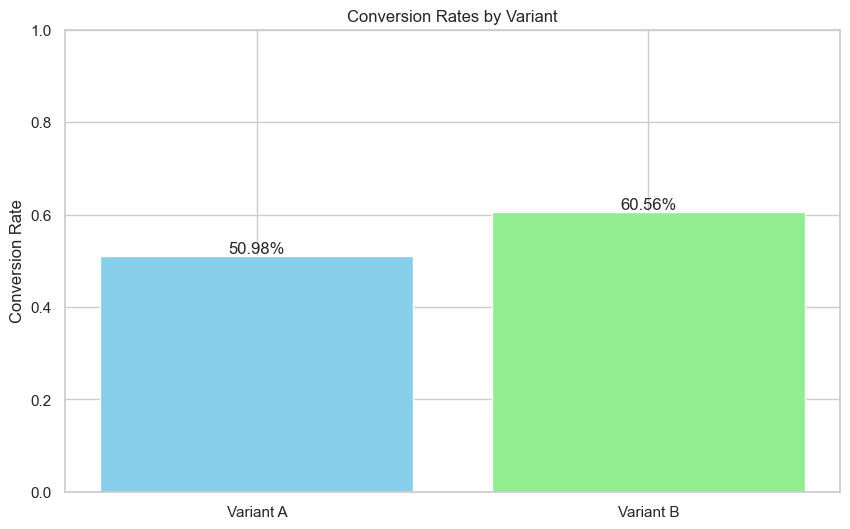

In [246]:
# Visualize conversion rates
plt.figure(figsize=(10, 6))
bars = plt.bar(['Variant A', 'Variant B'], [conv_rate_a, conv_rate_b], color=['skyblue', 'lightgreen'])
plt.title('Conversion Rates by Variant')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)  # Set y-axis limit to 1 for better visualization

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}', ha='center', va='bottom')

plt.show()

## 3.3 Conversion Rate Z-Test

In [247]:
# Perform statistical test for conversion rates
total_users_a = df[df['experiment_variant'] == 'A']['user_id'].nunique()
total_users_b = df[df['experiment_variant'] == 'B']['user_id'].nunique()
converted_users_a = df[(df['experiment_variant'] == 'A') & (df['event_name'] == 'subscribe')]['user_id'].nunique()
converted_users_b = df[(df['experiment_variant'] == 'B') & (df['event_name'] == 'subscribe')]['user_id'].nunique()

In [248]:
print(f"Variant A: {converted_users_a} converted users out of {total_users_a} total users")
print(f"Variant B: {converted_users_b} converted users out of {total_users_b} total users")

Variant A: 2457 converted users out of 4820 total users
Variant B: 2974 converted users out of 4911 total users


In [249]:
z_stat, p_value = proportions_ztest([converted_users_a, converted_users_b], [total_users_a, total_users_b])
print(f"Z-test for conversion rates: p-value = {p_value:.4f}")
print(f"Z-statistic: {z_stat:.4f}")

Z-test for conversion rates: p-value = 0.0000
Z-statistic: -9.5171


## 3.4 Conversion Rate Z-Test Hypothesis Testing

In [250]:
alpha = 0.05
print("\nNull Hypothesis: There is no significant difference in conversion rates between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in conversion rates between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no significant difference in conversion rates between variants A and B.
Alternative Hypothesis: There is a significant difference in conversion rates between variants A and B.
Result: Reject the null hypothesis (p-value: 0.0000, α: 0.05)


# 4. Revenue and LTV Analysis

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 4.1 LTV Calculate

In [252]:
def calculate_ltv(group):
    revenue = group[group['event_name'] == 'subscribe']['revenue'].sum() - \
              group[group['event_name'] == 'refund']['revenue'].sum()
    return pd.Series({'ltv': revenue})

In [253]:
# Uyarıyı gidermek için include_groups=False ekledik
user_ltv = df.groupby(['user_id', 'experiment_variant'], as_index=False).apply(calculate_ltv, include_groups=False)

In [254]:
user_ltv.head()

,user_id,experiment_variant,ltv
0,0000922C,B,13.99
1,000263BC,B,18.88
2,0004AACF,B,0.00
3,0008D07A,B,44.01
4,000AF0D4,B,13.99


In [255]:
user_ltv.tail()

,user_id,experiment_variant,ltv
9726,FFE53E14,A,0.00
9727,FFE9E8BE,B,13.99
9728,FFEA4B36,B,13.99
9729,FFF78533,B,13.99
9730,FFFDAB3D,A,39.12


In [256]:
ltv_by_variant = user_ltv.groupby('experiment_variant')['ltv'].agg(['mean', 'median', 'count', 'std'])
print(" ------------ LTV by Variant: ------------ ")
ltv_by_variant

 ------------ LTV by Variant: ------------ 


,mean,median,count,std
experiment_variant,,,,
A,13.154135,4.89,4820,17.086190
B,13.010491,9.78,4911,14.913326


## 4.2 LTV By Variant Visualization

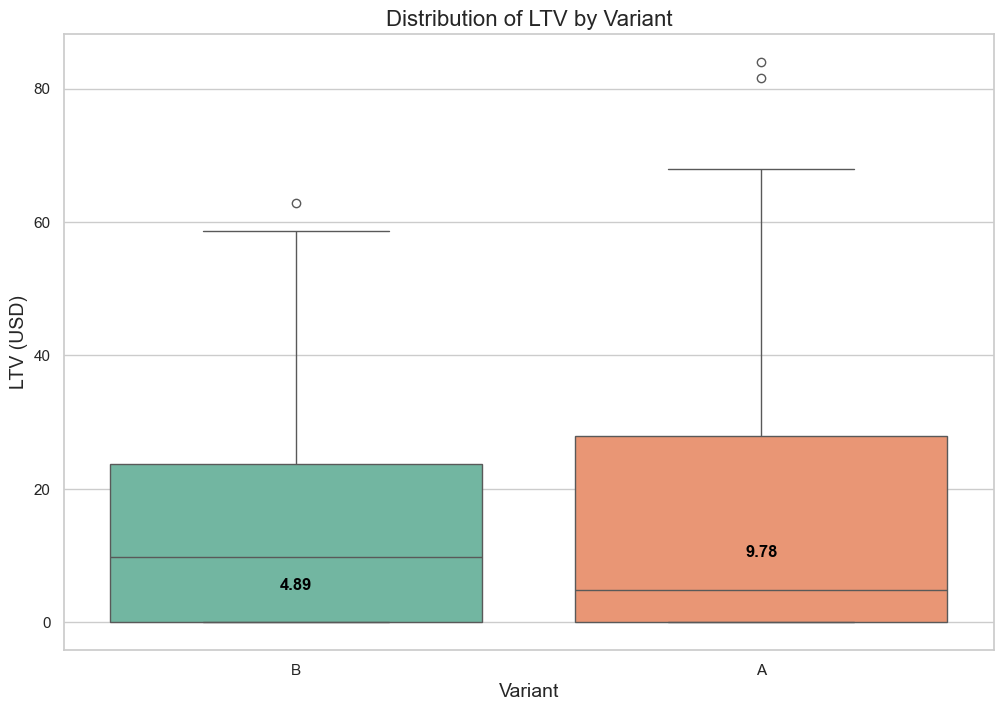

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create the boxplot
ax = sns.boxplot(x='experiment_variant', y='ltv', data=user_ltv, hue='experiment_variant', palette='Set2', legend=False)

# Add a title and labels
ax.set_title('Distribution of LTV by Variant', fontsize=16)
ax.set_xlabel('Variant', fontsize=14)
ax.set_ylabel('LTV (USD)', fontsize=14)

# Add value labels on the median lines
medians = user_ltv.groupby(['experiment_variant'])['ltv'].median().values
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.2f}', horizontalalignment='center', fontsize=12, color='black', weight='semibold')

# Show the plot
plt.show()

## 4.3 LTV By Variant Mann-Whitney Test

In [258]:
# Perform statistical test for LTV
variant_a = user_ltv[user_ltv['experiment_variant'] == 'A']['ltv']
variant_b = user_ltv[user_ltv['experiment_variant'] == 'B']['ltv']
statistic, p_value = stats.mannwhitneyu(variant_a, variant_b, alternative='two-sided')

In [259]:
# P-değerini daha fazla basamakla göster
print(f"Mann-Whitney U test for LTV: p-value = {p_value:.8f}")

Mann-Whitney U test for LTV: p-value = 0.00006835


## 4.4 LTV By Variant Mann-Whitney Test Hypothesis Testing

In [260]:
alpha = 0.05
print("\nNull Hypothesis: There is no significant difference in LTV between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in LTV between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.8f}, α: {alpha})")


Null Hypothesis: There is no significant difference in LTV between variants A and B.
Alternative Hypothesis: There is a significant difference in LTV between variants A and B.
Result: Reject the null hypothesis (p-value: 0.00006835, α: 0.05)


## 4.5 Calculate Effect Size (Cohen's d)

In [261]:
ltv_mean_diff = ltv_by_variant.loc['B', 'mean'] - ltv_by_variant.loc['A', 'mean']
print(f"\nMean difference in LTV between variants: {ltv_mean_diff:.2f}")

ltv_pooled_std = np.sqrt((ltv_by_variant.loc['A', 'std']**2 + ltv_by_variant.loc['B', 'std']**2) / 2)
print(f"\nPooled Standard Deviation for LTV: {ltv_pooled_std:.2f}")

effect_size = ltv_mean_diff / ltv_pooled_std
print(f"\nEffect Size (Cohen's d) for LTV difference: {effect_size:.4f}")


Mean difference in LTV between variants: -0.14

Pooled Standard Deviation for LTV: 16.04

Effect Size (Cohen's d) for LTV difference: -0.0090


In [262]:
if abs(effect_size) < 0.2:
    effect_interpretation = "small"
elif abs(effect_size) < 0.5:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"This indicates a {effect_interpretation} effect size.")

This indicates a small effect size.


In [263]:
# Sonuçların yorumlanması
print("\nInterpretation of Results:")
print(f"1. The mean LTV for Variant A is ${ltv_by_variant.loc['A', 'mean']:.2f}, while for Variant B it is ${ltv_by_variant.loc['B', 'mean']:.2f}.")
print(f"2. The median LTV for Variant A is ${ltv_by_variant.loc['A', 'median']:.2f}, while for Variant B it is ${ltv_by_variant.loc['B', 'median']:.2f}.")
print(f"3. The statistical test shows a significant difference in LTV between the variants (p-value: {p_value:.8f}).")
print(f"4. However, the effect size is {effect_interpretation} (Cohen's d = {effect_size:.4f}), suggesting that while statistically significant, the practical difference in LTV between variants may be limited.")
print("5. The higher median LTV in Variant B, despite a slightly lower mean, suggests that Variant B might be more effective at increasing LTV for a larger proportion of users, even if it doesn't lead to higher extreme values.")
print("6. Further investigation into the distribution of LTV and potential outliers in both variants is recommended to fully understand the impact of each variant on LTV.")


Interpretation of Results:
1. The mean LTV for Variant A is $13.15, while for Variant B it is $13.01.
2. The median LTV for Variant A is $4.89, while for Variant B it is $9.78.
3. The statistical test shows a significant difference in LTV between the variants (p-value: 0.00006835).
4. However, the effect size is small (Cohen's d = -0.0090), suggesting that while statistically significant, the practical difference in LTV between variants may be limited.
5. The higher median LTV in Variant B, despite a slightly lower mean, suggests that Variant B might be more effective at increasing LTV for a larger proportion of users, even if it doesn't lead to higher extreme values.
6. Further investigation into the distribution of LTV and potential outliers in both variants is recommended to fully understand the impact of each variant on LTV.


## 5.1 Subscription Duration Analysis

In [265]:
from prettytable import PrettyTable

subscription_durations = df[df['event_name'] == 'subscribe']['productDuration'].value_counts()

print("Distribution of subscription durations:")

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Subscription Duration", "Count"]

# Add rows to the table
for duration, count in subscription_durations.items():
    table.add_row([duration, count])

# Print the table
print(table)

Distribution of subscription durations:
+-----------------------+-------+
| Subscription Duration | Count |
+-----------------------+-------+
|         1 Week        | 13793 |
|        12 Month       |  2671 |
+-----------------------+-------+


## 5.2 Distribution of Subscription Durations by Variant Visualization

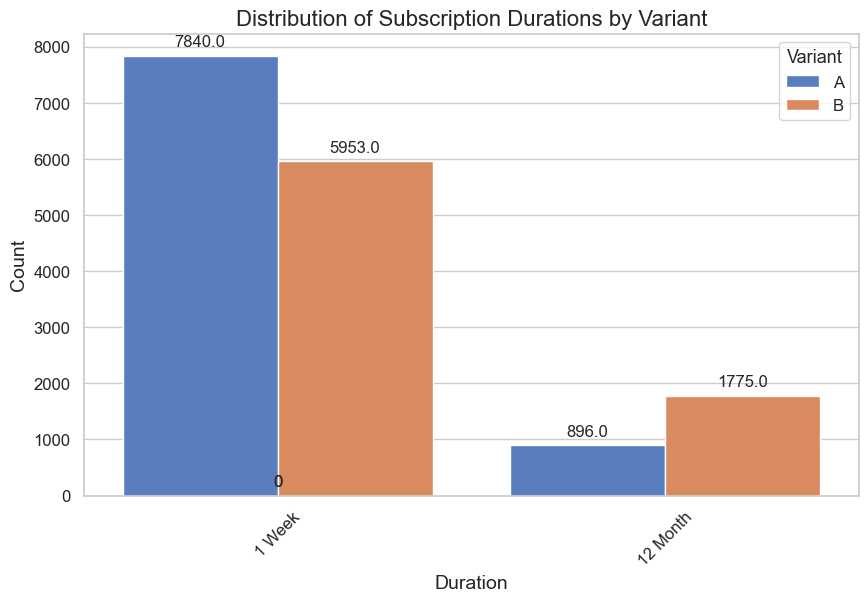

In [329]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="muted")

ax = sns.countplot(x='productDuration', hue='experiment_variant', data=df[df['event_name'] == 'subscribe'])
plt.title('Distribution of Subscription Durations by Variant', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.legend(title='Variant', title_fontsize='13', fontsize='12')
plt.show()

## 5.3 Subscription Duration Distribution Chi-Square Test 

In [267]:
# Chi-square test for subscription duration distribution
duration_counts = pd.crosstab(df[df['event_name'] == 'subscribe']['productDuration'], 
                              df[df['event_name'] == 'subscribe']['experiment_variant'])
chi2, p_value, dof, expected = stats.chi2_contingency(duration_counts)
print(f"Chi-square test for subscription duration distribution:")

test_table = PrettyTable()

test_table.field_names = ["Metric", "Value"]

test_table.add_row(["Chi-square statistic", f"{chi2:.4f}"])
test_table.add_row(["", ""])
test_table.add_row(["Degrees of Freedom", f"{dof}"])
test_table.add_row(["", ""])
test_table.add_row(["p-value", f"{p_value:.4e}"])
test_table.add_row(["", ""])
test_table.add_row(["Expected frequencies", f"{expected}"])

print(test_table)


Chi-square test for subscription duration distribution:
+----------------------+---------------------------------+
|        Metric        |              Value              |
+----------------------+---------------------------------+
| Chi-square statistic |             486.6064            |
|                      |                                 |
|  Degrees of Freedom  |                1                |
|                      |                                 |
|       p-value        |           7.8025e-108           |
|                      |                                 |
| Expected frequencies |  [[7318.73469388 6474.26530612] |
|                      |  [1417.26530612 1253.73469388]] |
+----------------------+---------------------------------+


## 5.4 Subscription Duration Distribution Chi-Square Test Hypothesis Testing

In [268]:
alpha = 0.05
print("\nNull Hypothesis: There is no association between variant and subscription duration choice.")
print(f"Alternative Hypothesis: There is an association between variant and subscription duration choice.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no association between variant and subscription duration choice.
Alternative Hypothesis: There is an association between variant and subscription duration choice.
Result: Reject the null hypothesis (p-value: 0.0000, α: 0.05)


## 5.5 Average Subscription Duration Calculate

In [269]:
# Calculate average subscription duration for each variant
def duration_to_days(duration):
    if duration == '1 Week':
        return 7
    elif duration == '1 Month':
        return 30
    elif duration == '12 Month':
        return 365
    else:
        return np.nan

In [270]:
df['duration_days'] = df[df['event_name'] == 'subscribe']['productDuration'].apply(duration_to_days)
avg_duration = df[df['event_name'] == 'subscribe'].groupby('experiment_variant')['duration_days'].mean()

print("\nAverage subscription duration (in days) by variant:")

avg_table = PrettyTable()

avg_table.field_names = ["Variant", "Average Subscription Duration (days)"]
avg_table.add_row(["A", f"{avg_duration['A']:.4f}"])
avg_table.add_row(["B", f"{avg_duration['B']:.4f}"])

print(avg_table)


Average subscription duration (in days) by variant:
+---------+--------------------------------------+
| Variant | Average Subscription Duration (days) |
+---------+--------------------------------------+
|    A    |               43.7179                |
|    B    |               89.2270                |
+---------+--------------------------------------+


## 5.6 Average Subscription Duration Visualization

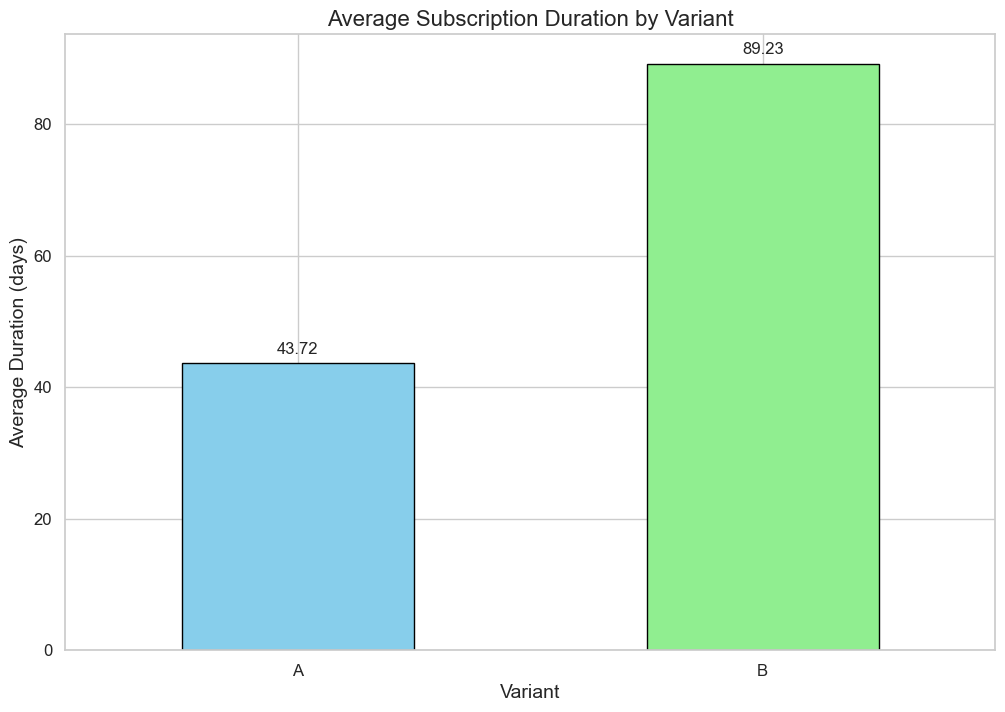

In [271]:
# Visualize average subscription duration
plt.figure(figsize=(12, 8))
ax = avg_duration.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Average Subscription Duration by Variant', fontsize=16)
plt.xlabel('Variant', fontsize=14)
plt.ylabel('Average Duration (days)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

# 6. Churn and Retention Analysis

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from prettytable import PrettyTable

## 6.1 Churn Rate by Variant & Duration Calculate

In [273]:
# Calculate churn rates by variant and duration
churn_rates = df[df['event_name'] == 'subscribe'].groupby(['experiment_variant', 'productDuration'], as_index=False).apply(
    lambda x: pd.Series({
        'subscribed_users': x['user_id'].nunique(),
        'churned_users': df[(df['user_id'].isin(x['user_id'])) & (df['event_name'] == 'auto_renew_off')]['user_id'].nunique(),
        'churn_rate': df[(df['user_id'].isin(x['user_id'])) & (df['event_name'] == 'auto_renew_off')]['user_id'].nunique() / x['user_id'].nunique()
    }),
    include_groups=False
).reset_index()

print("Churn rates by variant and duration:")

# Create a PrettyTable object
table = PrettyTable()

# Add field names
table.field_names = ["Variant", "Duration", "Subscribed Users", "Churned Users", "Churn Rate"]

# Add rows to the table
for _, row in churn_rates.iterrows():
    table.add_row([row['experiment_variant'], row['productDuration'], row['subscribed_users'], row['churned_users'], f"{row['churn_rate']:.2%}"])

# Print the table
print(table)


Churn rates by variant and duration:
+---------+----------+------------------+---------------+------------+
| Variant | Duration | Subscribed Users | Churned Users | Churn Rate |
+---------+----------+------------------+---------------+------------+
|    A    |  1 Week  |      1604.0      |     1063.0    |   66.27%   |
|    A    | 12 Month |      889.0       |     294.0     |   33.07%   |
|    B    |  1 Week  |      1285.0      |     848.0     |   65.99%   |
|    B    | 12 Month |      1770.0      |     567.0     |   32.03%   |
+---------+----------+------------------+---------------+------------+


## 6.2 Churn Rate by Variant & Duration Visualization

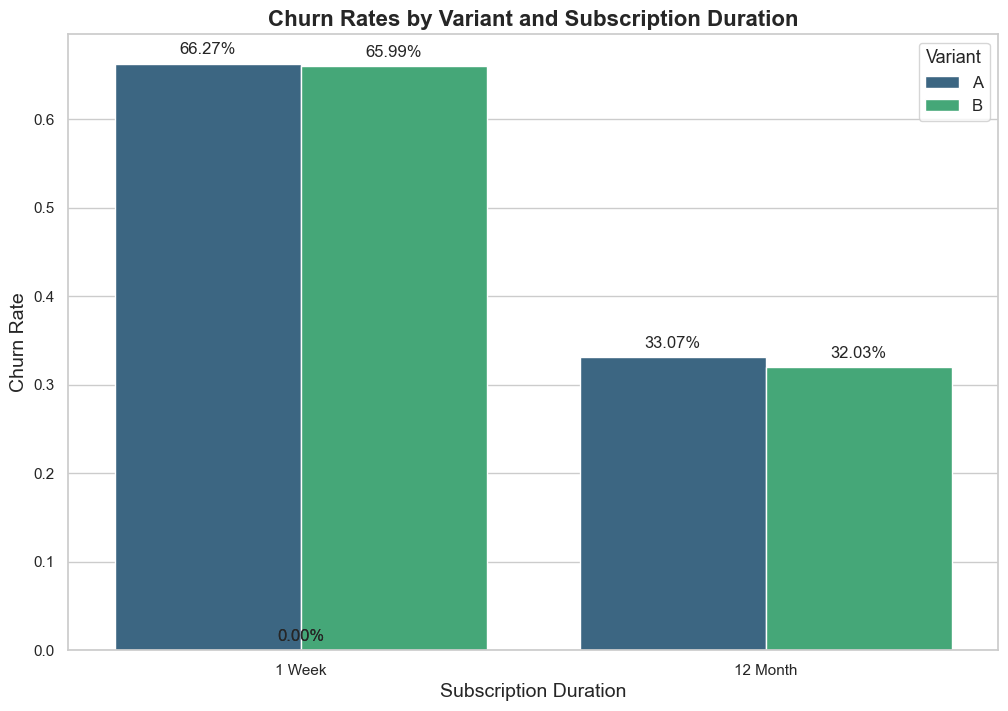

In [274]:
# Visualize churn rates
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", palette="muted")

# Create the bar plot
ax = sns.barplot(x='productDuration', y='churn_rate', hue='experiment_variant', data=churn_rates, palette='viridis')

# Add a title and labels
ax.set_title('Churn Rates by Variant and Subscription Duration', fontsize=16, fontweight='bold')
ax.set_xlabel('Subscription Duration', fontsize=14)
ax.set_ylabel('Churn Rate', fontsize=14)

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Customize the legend
plt.legend(title='Variant', title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

## 6.3 Churn Rate by Variant & Duration Z-Test, Cohen's D Test and Power Test

In [275]:
import numpy as np
from statsmodels.stats import power

alpha = 0.05  # Significance level

for duration in ['1 Week', '12 Month']:
    data_a = churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == duration)]
    data_b = churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == duration)]
    
    z_stat, p_value = proportions_ztest([data_a['churned_users'].iloc[0], data_b['churned_users'].iloc[0]], 
                                        [data_a['subscribed_users'].iloc[0], data_b['subscribed_users'].iloc[0]])
    
    print(f"\n\n\nZ-test for churn rates ({duration}):")
    print(f"p-value = {p_value:.8f}")
    print(f"\nNull Hypothesis (H0): There is no significant difference in churn rates between variants A and B for {duration}.")
    print(f"Alternative Hypothesis (H1): There is a significant difference in churn rates between variants A and B for {duration}.")
    
    if p_value < alpha:
        print(f"\nResult: Reject the null hypothesis (α: {alpha})")
        print("Interpretation: There is strong evidence to support a significant difference in churn rates between variants A and B.")
        print(f"Confidence: We are {(1-alpha)*100}% confident that the observed difference is not due to random chance.")
    else:
        print(f"\nResult: Fail to reject the null hypothesis (α: {alpha})")
        print("Interpretation: There is not enough evidence to support a significant difference in churn rates between variants A and B.")
        print("Note: This does not prove that the churn rates are exactly the same, only that we cannot detect a significant difference with the current data.")
    
    # Calculate effect size (Cohen's h)
    prop_a = data_a['churned_users'].iloc[0] / data_a['subscribed_users'].iloc[0]
    prop_b = data_b['churned_users'].iloc[0] / data_b['subscribed_users'].iloc[0]
    effect_size = 2 * np.arcsin(np.sqrt(prop_a)) - 2 * np.arcsin(np.sqrt(prop_b))
    
    print(f"\nEffect Size (Cohen's h): {effect_size:.4f}")
    if abs(effect_size) < 0.2:
        print("This indicates a small effect size.")
    elif abs(effect_size) < 0.5:
        print("This indicates a medium effect size.")
    else:
        print("This indicates a large effect size.")
    
    # Calculate power
    power_value = power.tt_ind_solve_power(effect_size=effect_size, 
                                           nobs1=data_a['subscribed_users'].iloc[0], 
                                           alpha=alpha, 
                                           ratio=data_b['subscribed_users'].iloc[0]/data_a['subscribed_users'].iloc[0])
    print(f"\nStatistical Power: {power_value:.4f}")
    if power_value < 0.8:
        print("The test may not have sufficient power to detect significant differences if they exist.")
        sample_size = power.tt_ind_solve_power(effect_size=effect_size, 
                                               power=0.8, 
                                               alpha=alpha, 
                                               ratio=data_b['subscribed_users'].iloc[0]/data_a['subscribed_users'].iloc[0])
        print(f"Recommended sample size for 80% power: {sample_size:.0f} per group")




Z-test for churn rates (1 Week):
p-value = 0.87459668

Null Hypothesis (H0): There is no significant difference in churn rates between variants A and B for 1 Week.
Alternative Hypothesis (H1): There is a significant difference in churn rates between variants A and B for 1 Week.

Result: Fail to reject the null hypothesis (α: 0.05)
Interpretation: There is not enough evidence to support a significant difference in churn rates between variants A and B.
Note: This does not prove that the churn rates are exactly the same, only that we cannot detect a significant difference with the current data.

Effect Size (Cohen's h): 0.0059
This indicates a small effect size.

Statistical Power: 0.0529
The test may not have sufficient power to detect significant differences if they exist.
Recommended sample size for 80% power: 505556 per group



Z-test for churn rates (12 Month):
p-value = 0.58982110

Null Hypothesis (H0): There is no significant difference in churn rates between variants A and B f

## 6.4 Additional Analysis: Average Revenue Per User (ARPU)

In [276]:
def calculate_arpu(df, variant):
    total_revenue = df[(df['experiment_variant'] == variant) & (df['event_name'] == 'subscribe')]['revenue'].sum()
    total_users = df[(df['experiment_variant'] == variant) & (df['event_name'] == 'subscribe')]['user_id'].nunique()
    return total_revenue / total_users if total_users > 0 else 0

arpu_a = calculate_arpu(df, 'A')
arpu_b = calculate_arpu(df, 'B')

print("\nAverage Revenue Per User (ARPU):")
print(f"Variant A: ${arpu_a:.2f}")
print(f"Variant B: ${arpu_b:.2f}")

# Retention analysis
def calculate_retention(df):
    df_retention = df[df['event_name'] == 'subscribe'].groupby('user_id').agg({
        'first_event_time': 'min',
        'event_time': 'max',
        'experiment_variant': 'first',
        'days_since_first_event': 'max'
    })
    return df_retention

retention_data = calculate_retention(df)

print("\nRetention Analysis:")
print(f"Mean retention days for Variant A: {retention_data[retention_data['experiment_variant'] == 'A']['days_since_first_event'].mean():.2f}")
print(f"Mean retention days for Variant B: {retention_data[retention_data['experiment_variant'] == 'B']['days_since_first_event'].mean():.2f}")


Average Revenue Per User (ARPU):
Variant A: $25.63
Variant B: $21.39

Retention Analysis:
Mean retention days for Variant A: 25.58
Mean retention days for Variant B: 18.53


# 7. Calculate LTV

In [277]:
# Calculate LTV
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
ltv_data = df[df['event_name'] == 'subscribe'].groupby(['experiment_variant', 'productDuration']).agg({
    'revenue': 'mean',
    'user_id': 'count'
}).reset_index()

## 7.1 Calculate LTV by Variant and Duration

In [278]:
ltv_data['retention_rate'] = 1 - churn_rates['churn_rate']
ltv_data['ltv'] = ltv_data['revenue'] / (1 - ltv_data['retention_rate'])

print("\nLifetime Value (LTV) by variant and duration:")

# Create a PrettyTable object
ltv_table = PrettyTable()
ltv_table.field_names = ["Variant", "Duration", "Subscribed Users", "LTV (USD)"]

# Add rows to the table
for _, row in ltv_data.iterrows():
    ltv_table.add_row([row['experiment_variant'], row['productDuration'], row['user_id'], f"${row['ltv']:.2f}"])

# Print the table
print(ltv_table)


Lifetime Value (LTV) by variant and duration:
+---------+----------+------------------+-----------+
| Variant | Duration | Subscribed Users | LTV (USD) |
+---------+----------+------------------+-----------+
|    A    |  1 Week  |       7840       |   $7.38   |
|    A    | 12 Month |       896        |   $83.20  |
|    B    |  1 Week  |       5953       |   $7.41   |
|    B    | 12 Month |       1775       |   $60.70  |
+---------+----------+------------------+-----------+


## 7.2 LTV by Variant and Duration Visualization

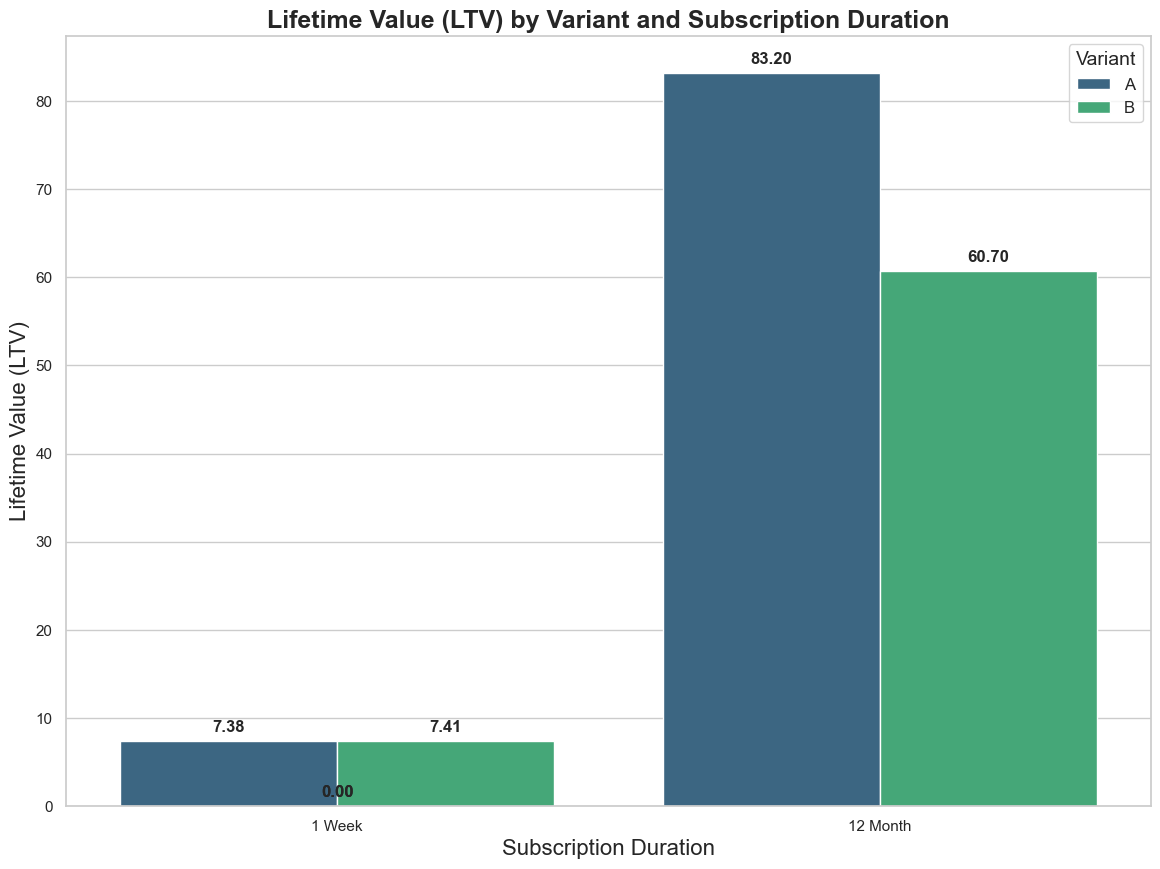

In [279]:
# Visualize LTV
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid", palette="muted")

# Create the bar plot
ax = sns.barplot(x='productDuration', y='ltv', hue='experiment_variant', data=ltv_data, palette='viridis')

# Add a title and labels
ax.set_title('Lifetime Value (LTV) by Variant and Subscription Duration', fontsize=18, fontweight='bold')
ax.set_xlabel('Subscription Duration', fontsize=16)
ax.set_ylabel('Lifetime Value (LTV)', fontsize=16)

# Customize the legend
plt.legend(title='Variant', title_fontsize='14', fontsize='12')

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Show the plot
plt.show()

## 8. Refund Analysis

In [280]:
def get_refund_rate(df, variant):
    subscribed_users = df[(df['experiment_variant'] == variant) & (df['event_name'] == 'subscribe')]['user_id'].nunique()
    refunded_users = df[(df['experiment_variant'] == variant) & (df['event_name'] == 'refund')]['user_id'].nunique()
    return refunded_users / subscribed_users

## 8.1 Calculate Refund by Variant

In [281]:
refund_rate_a = get_refund_rate(df, 'A')
refund_rate_b = get_refund_rate(df, 'B')

print(f"Refund rate for Variant A: {refund_rate_a:.2%}")
print(f"Refund rate for Variant B: {refund_rate_b:.2%}")

Refund rate for Variant A: 2.60%
Refund rate for Variant B: 1.71%


## 8.2 Calculate Refund by Variant Visualization

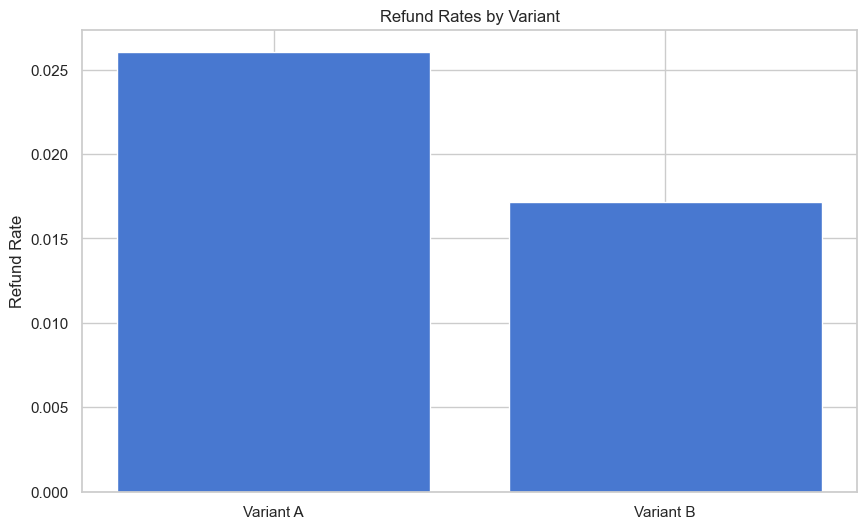

In [282]:
# Visualize refund rates
plt.figure(figsize=(10, 6))
plt.bar(['Variant A', 'Variant B'], [refund_rate_a, refund_rate_b])
plt.title('Refund Rates by Variant')
plt.ylabel('Refund Rate')
plt.show()

## 8.3 Refund Rate by Z-Test

In [283]:
# Perform statistical test for refund rates
subscribed_users_a = df[(df['experiment_variant'] == 'A') & (df['event_name'] == 'subscribe')]['user_id'].nunique()
subscribed_users_b = df[(df['experiment_variant'] == 'B') & (df['event_name'] == 'subscribe')]['user_id'].nunique()
refunded_users_a = df[(df['experiment_variant'] == 'A') & (df['event_name'] == 'refund')]['user_id'].nunique()
refunded_users_b = df[(df['experiment_variant'] == 'B') & (df['event_name'] == 'refund')]['user_id'].nunique()

z_stat, p_value = proportions_ztest([refunded_users_a, refunded_users_b], [subscribed_users_a, subscribed_users_b])

table = PrettyTable()
table.field_names = ["Variant", "Subscribed Users", "Refunded Users", "Refund Rate"]

table.add_row(['A', subscribed_users_a, refunded_users_a, f"{refund_rate_a:.2%}"])
table.add_row(['B', subscribed_users_b, refunded_users_b, f"{refund_rate_b:.2%}"])

print(table)

+---------+------------------+----------------+-------------+
| Variant | Subscribed Users | Refunded Users | Refund Rate |
+---------+------------------+----------------+-------------+
|    A    |       2457       |       64       |    2.60%    |
|    B    |       2974       |       51       |    1.71%    |
+---------+------------------+----------------+-------------+


In [284]:
z_stat, p_value = proportions_ztest([refunded_users_a, refunded_users_b], [subscribed_users_a, subscribed_users_b])
print(f"Z-test for refund rates: p-value = {p_value:.4f}")

Z-test for refund rates: p-value = 0.0234


## 8.4 Refund Rate by Z-Test Hypothesis Testing

In [285]:
# Hypothesis test
alpha = 0.05
print("\nNull Hypothesis: There is no significant difference in refund rates between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in refund rates between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no significant difference in refund rates between variants A and B.
Alternative Hypothesis: There is a significant difference in refund rates between variants A and B.
Result: Reject the null hypothesis (p-value: 0.0234, α: 0.05)


## 8.5 Time to Refund by Variant Visualization

In [286]:
# Analyze time to refund
df_refunds = df[df['event_name'] == 'refund'].copy()
df_refunds['time_to_refund'] = df_refunds['event_time'] - df_refunds['first_event_time']
df_refunds['time_to_refund_days'] = df_refunds['time_to_refund'].dt.total_seconds() / (24 * 60 * 60)

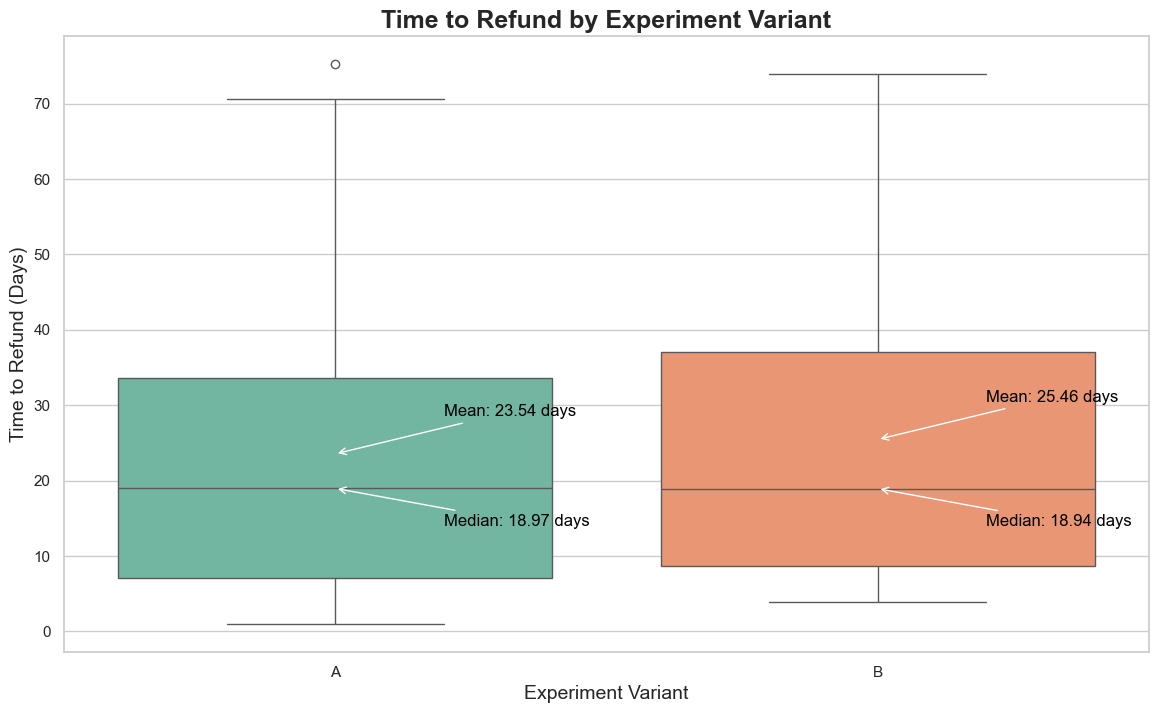

In [287]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", palette="muted")

# Create the boxplot
ax = sns.boxplot(x='experiment_variant', y='time_to_refund_days', data=df_refunds, hue='experiment_variant', palette='Set2', legend=False)

# Add a title and labels
ax.set_title('Time to Refund by Experiment Variant', fontsize=18, fontweight='bold')
ax.set_xlabel('Experiment Variant', fontsize=14)
ax.set_ylabel('Time to Refund (Days)', fontsize=14)

# Add gridlines for better readability
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add statistical annotations
mean_refund_time_a = df_refunds[df_refunds['experiment_variant'] == 'A']['time_to_refund_days'].mean()
mean_refund_time_b = df_refunds[df_refunds['experiment_variant'] == 'B']['time_to_refund_days'].mean()
median_refund_time_a = df_refunds[df_refunds['experiment_variant'] == 'A']['time_to_refund_days'].median()
median_refund_time_b = df_refunds[df_refunds['experiment_variant'] == 'B']['time_to_refund_days'].median()

# Annotate mean and median
ax.annotate(f'Mean: {mean_refund_time_a:.2f} days', xy=(0, mean_refund_time_a), xytext=(0.2, mean_refund_time_a + 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')
ax.annotate(f'Median: {median_refund_time_a:.2f} days', xy=(0, median_refund_time_a), xytext=(0.2, median_refund_time_a - 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

ax.annotate(f'Mean: {mean_refund_time_b:.2f} days', xy=(1, mean_refund_time_b), xytext=(1.2, mean_refund_time_b + 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')
ax.annotate(f'Median: {median_refund_time_b:.2f} days', xy=(1, median_refund_time_b), xytext=(1.2, median_refund_time_b - 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

# Show the plot
plt.show()

## 8.6 Time to Refund by Variant Mann-Whitney U Test

In [288]:
# Statistical test for time to refund
refund_time_a = df_refunds[df_refunds['experiment_variant'] == 'A']['time_to_refund_days']
refund_time_b = df_refunds[df_refunds['experiment_variant'] == 'B']['time_to_refund_days']
statistic, p_value = stats.mannwhitneyu(refund_time_a, refund_time_b, alternative='two-sided')

print(f"Mann-Whitney U test for time to refund: p-value = {p_value:.4f}")

Mann-Whitney U test for time to refund: p-value = 0.5413

Null Hypothesis: There is no significant difference in time to refund between variants A and B.
Alternative Hypothesis: There is a significant difference in time to refund between variants A and B.
Result: Fail to reject the null hypothesis (p-value: 0.5413, α: 0.05)


## 8.7 Time to Refund by Variant Mann-Whitney U Test Hypothesis Testing

In [330]:
# Hypothesis test
print("\nNull Hypothesis: There is no significant difference in time to refund between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in time to refund between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no significant difference in time to refund between variants A and B.
Alternative Hypothesis: There is a significant difference in time to refund between variants A and B.
Result: Fail to reject the null hypothesis (p-value: 0.8212, α: 0.05)


# 9. Cohort Analysis

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 9.1 Cohort Analysis Calculate

In [291]:
df['cohort'] = df['first_event_time'].dt.to_period('W')
df['week'] = (df['event_time'].dt.to_period('W') - df['cohort']).apply(lambda r: r.n)

In [292]:
def cohort_analysis(data, variant):
    cohort_data = data[data['experiment_variant'] == variant].groupby(['cohort', 'week'])['user_id'].nunique().unstack()
    cohort_sizes = cohort_data.iloc[:,0]
    retention_matrix = cohort_data.divide(cohort_sizes, axis=0)
    return retention_matrix.fillna(0)  # Fill NaN with 0 for better visualization

In [325]:
retention_a = cohort_analysis(df, 'A')
retention_b = cohort_analysis(df, 'B')

table = PrettyTable()
table.field_names = ["Variant", "Cohort", "Week 0", "Week 1", "Week 2", "Week 3", "Week 4"]

for i in range(len(retention_a)):
    row_a = ['A', retention_a.index[i]] + [f"{val:.6f}" if val % 1 != 0 else f"{val:.0f}" for val in retention_a.iloc[i, :5].values]
    row_b = ['B', retention_b.index[i]] + [f"{val:.6f}" if val % 1 != 0 else f"{val:.0f}" for val in retention_b.iloc[i, :5].values]
    table.add_row(row_a)
    table.add_row(row_b)
    table.add_row(['', '', '', '', '', '', ''])

print(table)

+---------+-----------------------+--------+----------+----------+----------+----------+
| Variant |         Cohort        | Week 0 |  Week 1  |  Week 2  |  Week 3  |  Week 4  |
+---------+-----------------------+--------+----------+----------+----------+----------+
|    A    | 2022-09-26/2022-10-02 |   1    |    2     |    1     |    1     |    1     |
|    B    | 2022-09-26/2022-10-02 |   1    | 1.666667 |    0     | 0.333333 |    0     |
|         |                       |        |          |          |          |          |
|    A    | 2022-10-03/2022-10-09 |   1    | 0.539823 | 0.345133 | 0.303413 | 0.268015 |
|    B    | 2022-10-03/2022-10-09 |   1    | 0.483653 | 0.288613 | 0.239008 | 0.202931 |
|         |                       |        |          |          |          |          |
|    A    | 2022-10-10/2022-10-16 |   1    | 0.394824 | 0.287989 | 0.242867 | 0.209025 |
|    B    | 2022-10-10/2022-10-16 |   1    | 0.377151 | 0.250516 | 0.194769 | 0.166552 |
|         |          

## 9.2 Cohort Analysis Heatmap Visualization

In [294]:
# Visualization function
def plot_retention_heatmap(retention_matrix, variant):
    plt.figure(figsize=(12, 8))
    sns.heatmap(retention_matrix, annot=True, fmt='.2%', cmap='YlGnBu')
    plt.title(f'Cohort Retention Heatmap - Variant {variant}')
    plt.xlabel('Week')
    plt.ylabel('Cohort')
    plt.show()

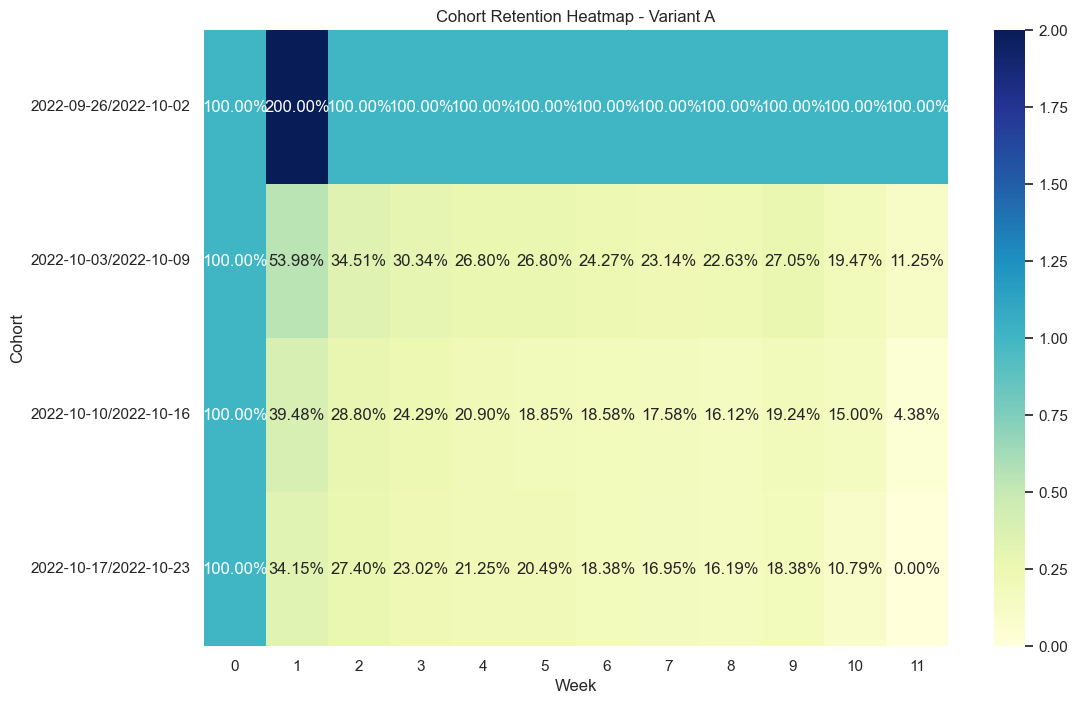

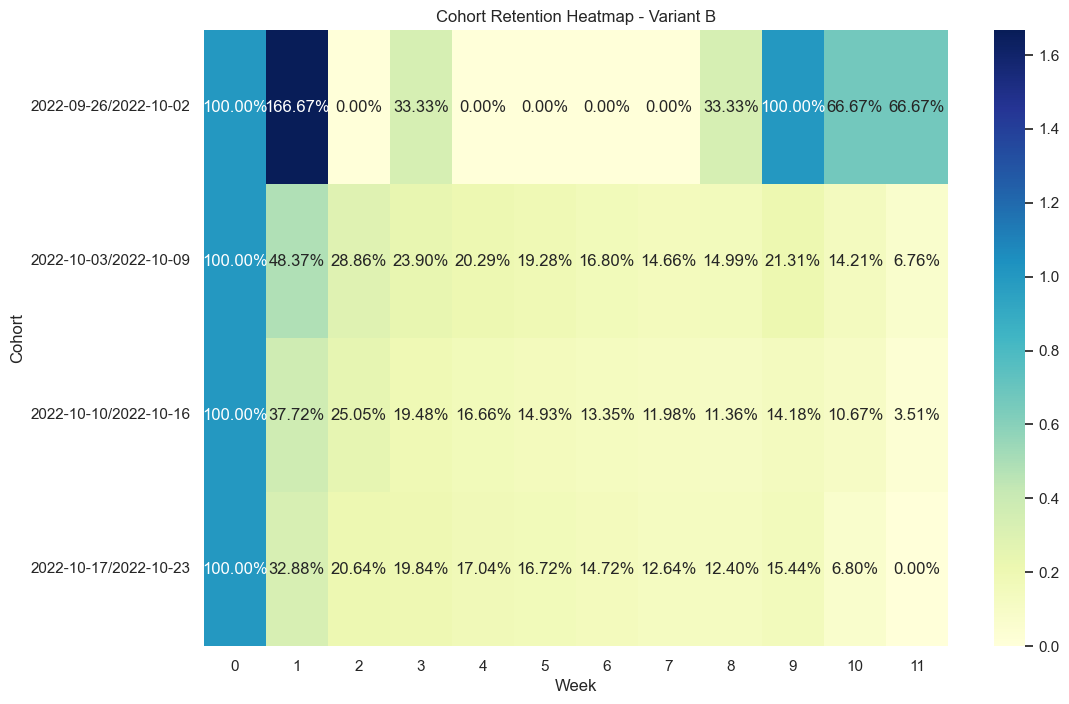

In [295]:
plot_retention_heatmap(retention_a, 'A')
plot_retention_heatmap(retention_b, 'B')

## 9.3 Average Retention Rate Comparison

In [296]:
# Compare average retention rates
avg_retention_a = retention_a.mean()
avg_retention_b = retention_b.mean()

In [297]:
table = PrettyTable()

table.field_names = ["Week", "Average Retention Rate (Variant A)", "Average Retention Rate (Variant B)"]

for i in range(len(avg_retention_a)):
    table.add_row([f"Week {i}", f"{avg_retention_a[i]:.2%}", f"{avg_retention_b[i]:.2%}"])

print(table)

+---------+------------------------------------+------------------------------------+
|   Week  | Average Retention Rate (Variant A) | Average Retention Rate (Variant B) |
+---------+------------------------------------+------------------------------------+
|  Week 0 |              100.00%               |              100.00%               |
|  Week 1 |               81.90%               |               71.41%               |
|  Week 2 |               47.68%               |               18.64%               |
|  Week 3 |               44.41%               |               24.14%               |
|  Week 4 |               42.24%               |               13.50%               |
|  Week 5 |               41.53%               |               12.73%               |
|  Week 6 |               40.31%               |               11.22%               |
|  Week 7 |               39.42%               |               9.82%                |
|  Week 8 |               38.74%               |      

## 9.4 Average Retention Rate Visualization

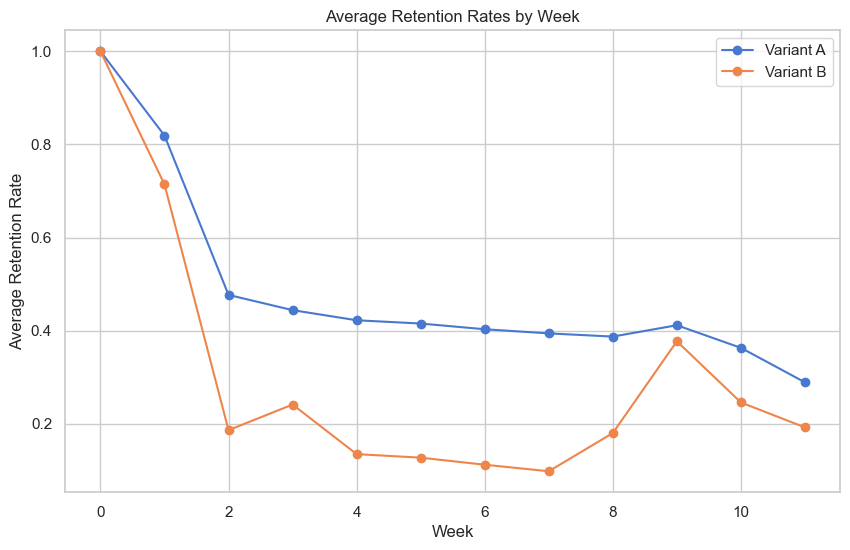

In [298]:
plt.figure(figsize=(10, 6))
plt.plot(avg_retention_a.index, avg_retention_a.values, label='Variant A', marker='o')
plt.plot(avg_retention_b.index, avg_retention_b.values, label='Variant B', marker='o')
plt.title('Average Retention Rates by Week')
plt.xlabel('Week')
plt.ylabel('Average Retention Rate')
plt.legend()
plt.show()

## 9.5 Retention Rate T-Test

In [299]:
# Statistical test for overall retention difference
retention_rates_a = retention_a.values.flatten()
retention_rates_b = retention_b.values.flatten()
t_stat, p_value = stats.ttest_ind(retention_rates_a, retention_rates_b, nan_policy='omit')
print(f"T-test for overall retention rates: p-value = {p_value:.4f}")

T-test for overall retention rates: p-value = 0.0232


## 9.6 Retention Rate T-Test Hypothesis Testing

In [300]:
# Hypothesis test
alpha = 0.05
print("\nNull Hypothesis: There is no significant difference in overall retention rates between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in overall retention rates between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no significant difference in overall retention rates between variants A and B.
Alternative Hypothesis: There is a significant difference in overall retention rates between variants A and B.
Result: Reject the null hypothesis (p-value: 0.0232, α: 0.05)


# 10. Analyze LTV by Cohort

In [301]:
# Analyze LTV by cohort
def calculate_ltv(group):
    revenue = group[group['event_name'] == 'subscribe']['revenue'].sum() - \
              group[group['event_name'] == 'refund']['revenue'].sum()
    return pd.Series({'ltv': revenue})

In [302]:
def cohort_ltv_analysis(data, variant):
    return data[data['experiment_variant'] == variant].groupby('cohort', as_index=False).apply(calculate_ltv, include_groups=False)

## 10.1 LTV by Cohort Calculate

In [303]:
# Cohort LTV analizi
ltv_cohort_a = cohort_ltv_analysis(df, 'A')
ltv_cohort_b = cohort_ltv_analysis(df, 'B')

In [304]:
ltv_cohort_table = PrettyTable()

ltv_cohort_table.field_names = ["Variant", "Cohort", "LTV (USD)"]

for i in range(len(ltv_cohort_a)):
    ltv_cohort_table.add_row(['A', ltv_cohort_a['cohort'].iloc[i], f"${ltv_cohort_a['ltv'].iloc[i]:.2f}"])
    ltv_cohort_table.add_row(['B', ltv_cohort_b['cohort'].iloc[i], f"${ltv_cohort_b['ltv'].iloc[i]:.2f}"])
    ltv_cohort_table.add_row(['', '', ''])

print(ltv_cohort_table)

+---------+-----------------------+-----------+
| Variant |         Cohort        | LTV (USD) |
+---------+-----------------------+-----------+
|    A    | 2022-09-26/2022-10-02 |  $135.57  |
|    B    | 2022-09-26/2022-10-02 |   $99.97  |
|         |                       |           |
|    A    | 2022-10-03/2022-10-09 | $16692.33 |
|    B    | 2022-10-03/2022-10-09 | $17422.63 |
|         |                       |           |
|    A    | 2022-10-10/2022-10-16 | $26222.08 |
|    B    | 2022-10-10/2022-10-16 | $25356.85 |
|         |                       |           |
|    A    | 2022-10-17/2022-10-23 | $20352.95 |
|    B    | 2022-10-17/2022-10-23 | $21015.07 |
|         |                       |           |
+---------+-----------------------+-----------+


## 10.2 LTV by Cohort Visualization

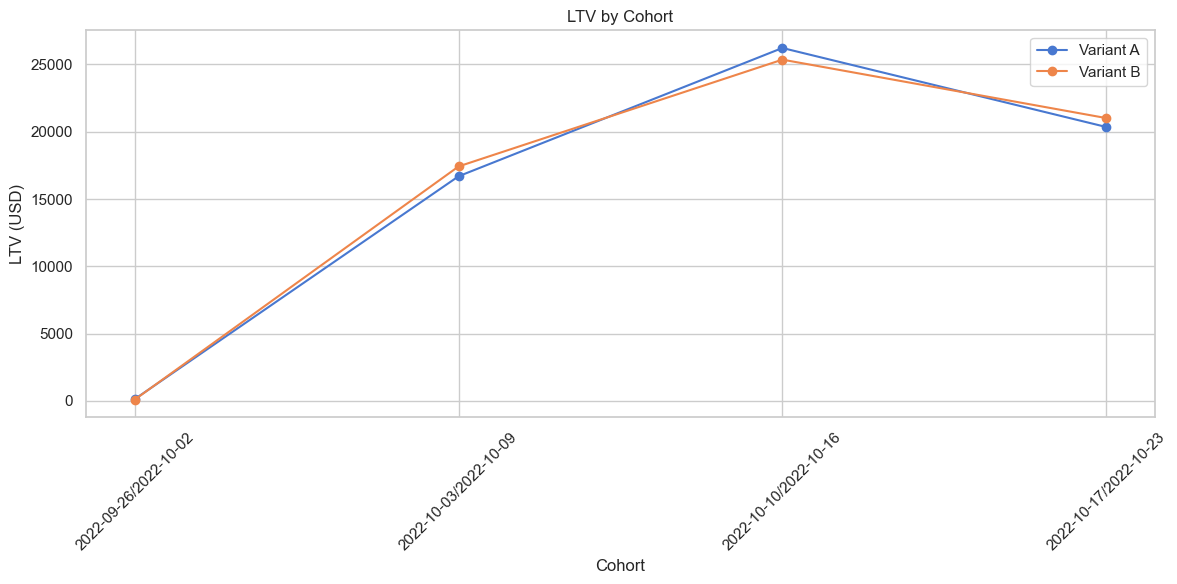

In [305]:
# LTV by Cohort grafiği
plt.figure(figsize=(12, 6))
plt.plot(ltv_cohort_a['cohort'].astype(str), ltv_cohort_a['ltv'], marker='o', label='Variant A')
plt.plot(ltv_cohort_b['cohort'].astype(str), ltv_cohort_b['ltv'], marker='o', label='Variant B')
plt.title('LTV by Cohort')
plt.xlabel('Cohort')
plt.ylabel('LTV (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10.3 LTV Growth Rate Comparison

In [306]:
# LTV büyüme oranı karşılaştırması
ltv_growth_rate_a = ltv_cohort_a['ltv'].pct_change().mean()
ltv_growth_rate_b = ltv_cohort_b['ltv'].pct_change().mean()

ltv_growth_table = PrettyTable()

ltv_growth_table.field_names = ["Variant", "LTV Growth Rate"]

ltv_growth_table.add_row(['A', f"{ltv_growth_rate_a:.2%}"])
ltv_growth_table.add_row(['B', f"{ltv_growth_rate_b:.2%}"])

print(ltv_growth_table)


+---------+-----------------+
| Variant | LTV Growth Rate |
+---------+-----------------+
|    A    |     4082.47%    |
|    B    |     5785.43%    |
+---------+-----------------+


## 10.4 LTV Growth Rate T-Test

In [307]:
# LTV büyüme oranı için istatistiksel test
t_stat, p_value = stats.ttest_ind(ltv_cohort_a['ltv'].pct_change().dropna(),
                                  ltv_cohort_b['ltv'].pct_change().dropna())
print(f"\nT-test for LTV growth rates: p-value = {p_value:.4f}")


T-test for LTV growth rates: p-value = 0.8212


## 10.5 LTV Growth Rate T-Test Hypothesis Testing

In [308]:
alpha = 0.05
print("\nNull Hypothesis: There is no significant difference in LTV growth rates between variants A and B.")
print(f"Alternative Hypothesis: There is a significant difference in LTV growth rates between variants A and B.")
print(f"Result: {'Reject' if p_value < alpha else 'Fail to reject'} the null hypothesis (p-value: {p_value:.4f}, α: {alpha})")


Null Hypothesis: There is no significant difference in LTV growth rates between variants A and B.
Alternative Hypothesis: There is a significant difference in LTV growth rates between variants A and B.
Result: Fail to reject the null hypothesis (p-value: 0.8212, α: 0.05)


## 10.6 Additional Analysis: Difference in LTV Between Cohorts

In [309]:
# Additional analysis: Difference in LTV between cohorts
ltv_diff = pd.merge(ltv_cohort_a, ltv_cohort_b, on='cohort', suffixes=('_A', '_B'))
ltv_diff['ltv_diff'] = ltv_diff['ltv_B'] - ltv_diff['ltv_A']

In [310]:
ltv_diff_table = PrettyTable()

ltv_diff_table.field_names = ["Cohort", "LTV (Variant A)", "LTV (Variant B)", "LTV Difference"]

for i in range(len(ltv_diff)):
    ltv_diff_table.add_row([ltv_diff['cohort'].iloc[i], f"${ltv_diff['ltv_A'].iloc[i]:.2f}", f"${ltv_diff['ltv_B'].iloc[i]:.2f}", f"${ltv_diff['ltv_diff'].iloc[i]:.2f}"])
    ltv_diff_table.add_row(['', '', '', ''])

print(ltv_diff_table)

+-----------------------+-----------------+-----------------+----------------+
|         Cohort        | LTV (Variant A) | LTV (Variant B) | LTV Difference |
+-----------------------+-----------------+-----------------+----------------+
| 2022-09-26/2022-10-02 |     $135.57     |      $99.97     |    $-35.60     |
|                       |                 |                 |                |
| 2022-10-03/2022-10-09 |    $16692.33    |    $17422.63    |    $730.30     |
|                       |                 |                 |                |
| 2022-10-10/2022-10-16 |    $26222.08    |    $25356.85    |    $-865.23    |
|                       |                 |                 |                |
| 2022-10-17/2022-10-23 |    $20352.95    |    $21015.07    |    $662.12     |
|                       |                 |                 |                |
+-----------------------+-----------------+-----------------+----------------+


## 10.7 Additional Analysis: Difference in LTV Between Cohorts Visualization

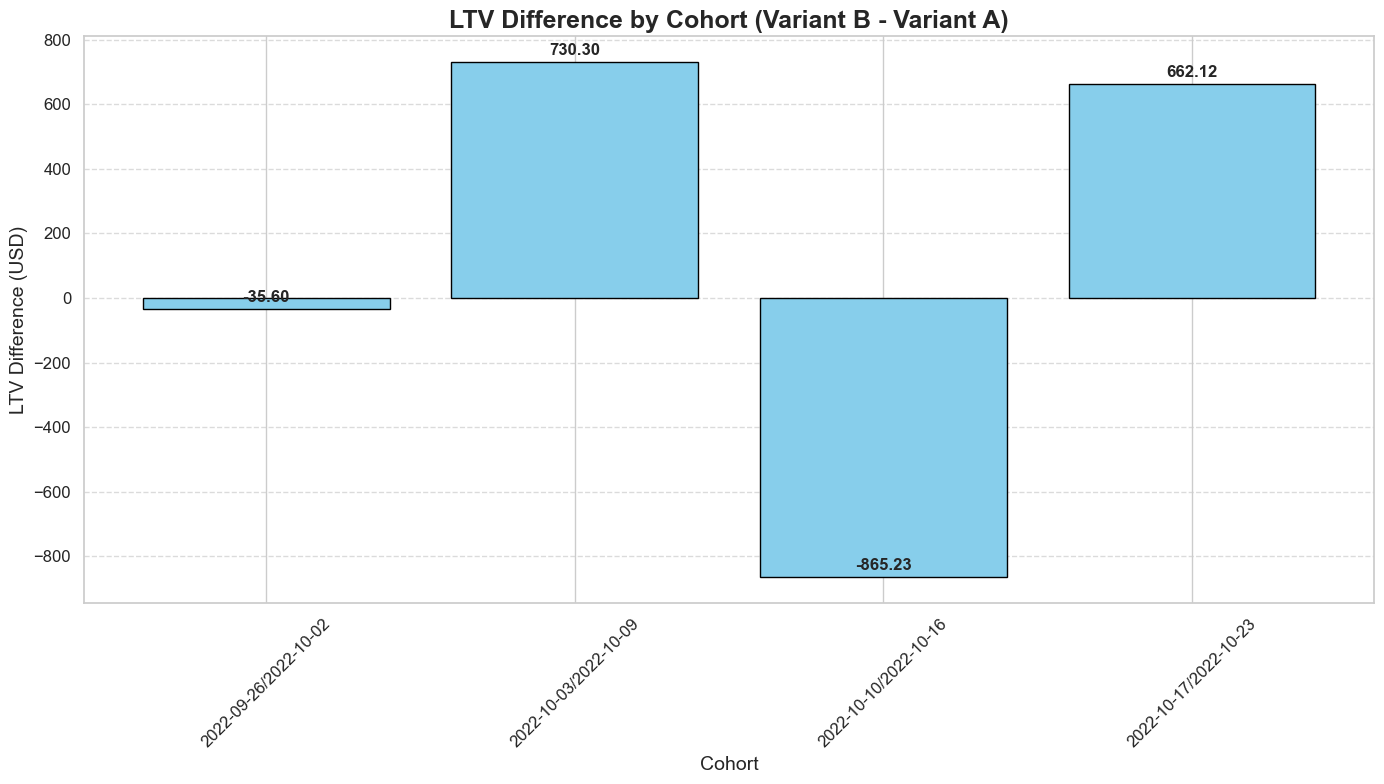

In [311]:
plt.figure(figsize=(14, 8))
bars = plt.bar(ltv_diff['cohort'].astype(str), ltv_diff['ltv_diff'], color='skyblue', edgecolor='black')

# Add a title and labels
plt.title('LTV Difference by Cohort (Variant B - Variant A)', fontsize=18, fontweight='bold')
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('LTV Difference (USD)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

## 10.8 Additional Analysis Conclusion

In [312]:
print("\nConclusion:")
print("1. The LTV by Cohort graph shows how different cohorts generate revenue over time for each variant.")
print("2. The LTV growth rate comparison reveals if one variant is better at increasing LTV over time.")
print("3. The statistical test for LTV growth rates indicates whether there's a significant difference between variants.")
print("4. The LTV Difference by Cohort graph highlights where and by how much one variant outperforms the other in terms of LTV.")
print(f"5. Variant {'B' if ltv_growth_rate_b > ltv_growth_rate_a else 'A'} shows a higher average LTV growth rate.")
print(f"6. The difference in LTV growth rates is {'statistically significant' if p_value < alpha else 'not statistically significant'}.")


Conclusion:
1. The LTV by Cohort graph shows how different cohorts generate revenue over time for each variant.
2. The LTV growth rate comparison reveals if one variant is better at increasing LTV over time.
3. The statistical test for LTV growth rates indicates whether there's a significant difference between variants.
4. The LTV Difference by Cohort graph highlights where and by how much one variant outperforms the other in terms of LTV.
5. Variant B shows a higher average LTV growth rate.
6. The difference in LTV growth rates is not statistically significant.


## 11. Conclusion and Recommendations

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 11.1 Summary of Key Metrics 

In [314]:
# Summarize key metrics
key_metrics = pd.DataFrame({
    'Metric': ['Users', 'Subscriptions', 'Conversion Rate', 'LTV', 'ARPU', 'Churn Rate 1 Week', 'Churn Rate 12 Month', 'Refund Rate'], 
    'Variant A': [len(df[df['experiment_variant'] == 'A']['user_id'].unique()),
                    len(df[(df['experiment_variant'] == 'A') & (df['event_name'] == 'subscribe')]['user_id'].unique()),
                    len(df[(df['experiment_variant'] == 'A') & (df['event_name'] == 'subscribe')]['user_id'].unique()) / len(df[df['experiment_variant'] == 'A']['user_id'].unique()),
                    ltv_by_variant.loc['A', 'mean'],
                    arpu_a,
                    churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == '1 Week')]['churn_rate'].iloc[0],
                    churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0],
                    refund_rate_a],
    'Variant B': [len(df[df['experiment_variant'] == 'B']['user_id'].unique()),
                    len(df[(df['experiment_variant'] == 'B') & (df['event_name'] == 'subscribe')]['user_id'].unique()),
                    len(df[(df['experiment_variant'] == 'B') & (df['event_name'] == 'subscribe')]['user_id'].unique()) / len(df[df['experiment_variant'] == 'B']['user_id'].unique()),
                    ltv_by_variant.loc['B', 'mean'],
                    arpu_b,
                    churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == '1 Week')]['churn_rate'].iloc[0],
                    churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0],
                    refund_rate_b]
})

In [315]:
print("Summary of Key Metrics:")

# Create a PrettyTable object
key_metrics_table = PrettyTable()

# Add field names
key_metrics_table.field_names = key_metrics.columns

# Add rows to the table
for _, row in key_metrics.iterrows():
    key_metrics_table.add_row(row)
    key_metrics_table.add_row([""] * len(key_metrics.columns)) # Add an empty row between metrics

# Print the table
print(key_metrics_table)


Summary of Key Metrics:
+---------------------+----------------------+---------------------+
|        Metric       |      Variant A       |      Variant B      |
+---------------------+----------------------+---------------------+
|        Users        |        4820.0        |        4911.0       |
|                     |                      |                     |
|    Subscriptions    |        2457.0        |        2974.0       |
|                     |                      |                     |
|   Conversion Rate   |  0.5097510373443983  |  0.6055793117491346 |
|                     |                      |                     |
|         LTV         |  13.154134854771785  |  13.010490735084504 |
|                     |                      |                     |
|         ARPU        |  25.632710622710622  |  21.394394754539345 |
|                     |                      |                     |
|  Churn Rate 1 Week  |  0.662718204488778   |  0.6599221789883268 |
|         

## 11.2 Summary of Key Metrics Visualization

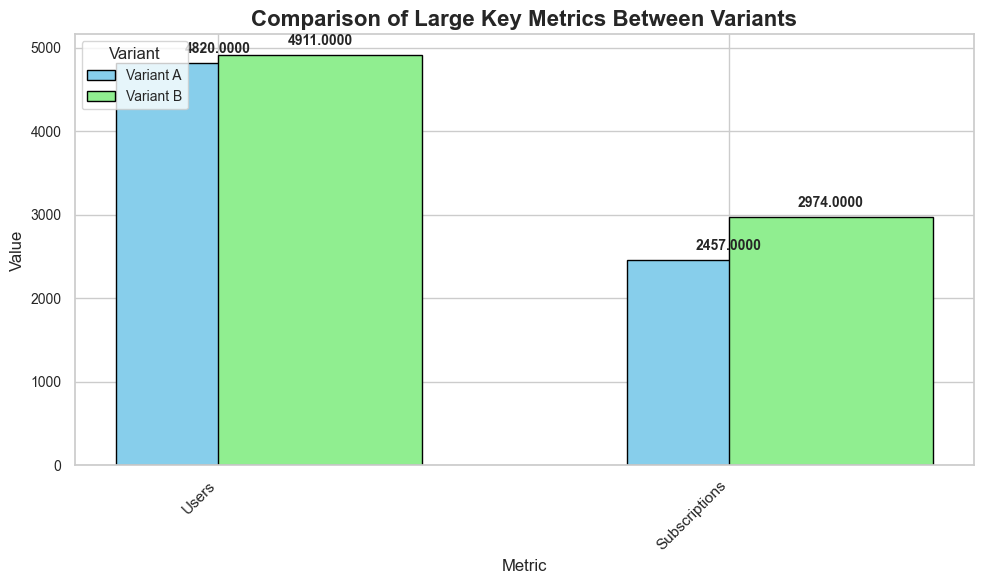

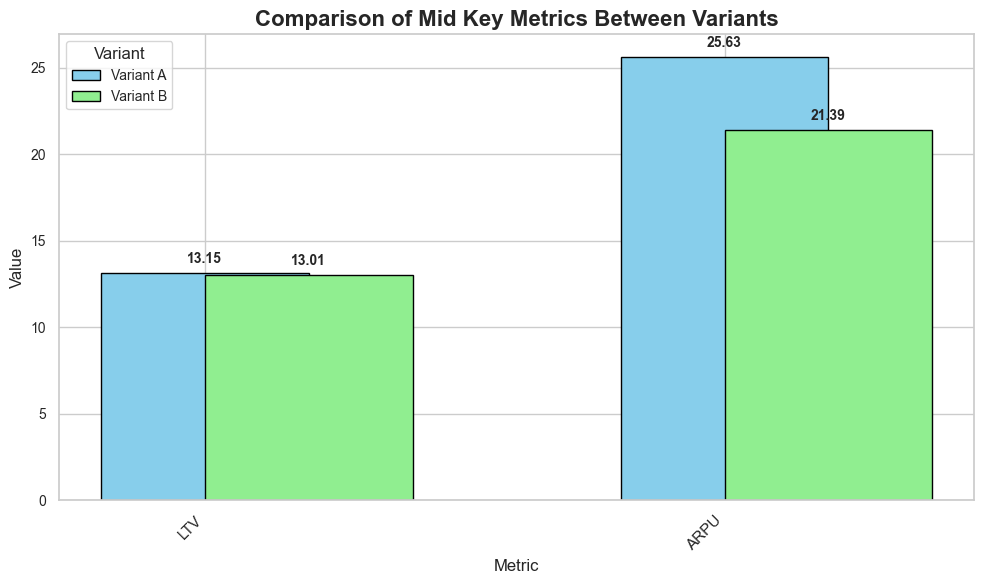

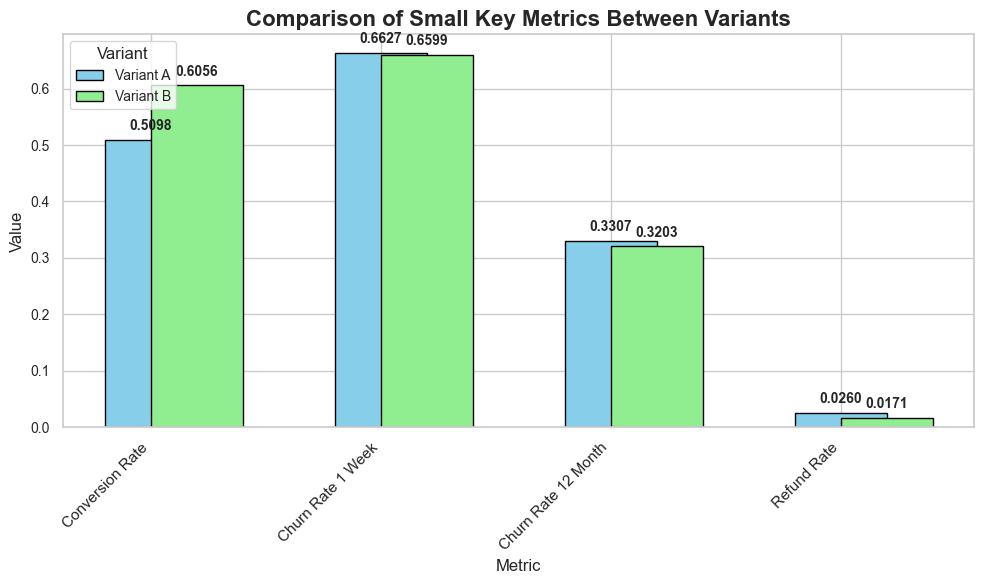

In [316]:
# Separate the metrics into three categories
large_metrics = key_metrics[key_metrics['Metric'].isin(['Users', 'Subscriptions'])]
mid_metrics = key_metrics[key_metrics['Metric'].isin(['LTV', 'ARPU'])]
small_metrics = key_metrics[~key_metrics['Metric'].isin(['Users', 'Subscriptions', 'LTV', 'ARPU'])]

# Plot large values
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(large_metrics['Metric'], large_metrics['Variant A'], width=0.4, label='Variant A', color='skyblue', edgecolor='black', align='center')
ax1.bar(large_metrics['Metric'], large_metrics['Variant B'], width=0.4, label='Variant B', color='lightgreen', edgecolor='black', align='edge')
ax1.set_title('Comparison of Large Key Metrics Between Variants', fontsize=16, fontweight='bold')
ax1.set_xlabel('Metric', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc='upper left', title='Variant', title_fontsize=12, fontsize=10)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot mid values
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(mid_metrics['Metric'], mid_metrics['Variant A'], width=0.4, label='Variant A', color='skyblue', edgecolor='black', align='center')
ax2.bar(mid_metrics['Metric'], mid_metrics['Variant B'], width=0.4, label='Variant B', color='lightgreen', edgecolor='black', align='edge')
ax2.set_title('Comparison of Mid Key Metrics Between Variants', fontsize=16, fontweight='bold')
ax2.set_xlabel('Metric', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.legend(loc='upper left', title='Variant', title_fontsize=12, fontsize=10)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.4}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot small values
fig, ax3 = plt.subplots(figsize=(10, 6))
ax3.bar(small_metrics['Metric'], small_metrics['Variant A'], width=0.4, label='Variant A', color='skyblue', edgecolor='black', align='center')
ax3.bar(small_metrics['Metric'], small_metrics['Variant B'], width=0.4, label='Variant B', color='lightgreen', edgecolor='black', align='edge')
ax3.set_title('Comparison of Small Key Metrics Between Variants', fontsize=16, fontweight='bold')
ax3.set_xlabel('Metric', fontsize=12)
ax3.set_ylabel('Value', fontsize=12)
ax3.tick_params(axis='y', labelsize=10)
ax3.legend(loc='upper left', title='Variant', title_fontsize=12, fontsize=10)
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 11.3 Determine The Winning Variant Based on Overall Performance

In [317]:
# Determine the winning variant based on overall performance
def determine_winner(ltv_a, ltv_b, conv_rate_a, conv_rate_b, churn_rate_a, churn_rate_b, refund_rate_a, refund_rate_b, duration_a, duration_b):
    score_a = ltv_a * 0.2 + conv_rate_a * 0.2 + (1 - churn_rate_a) * 0.2 + (1 - refund_rate_a) * 0.2 + duration_a * 0.2
    score_b = ltv_b * 0.2 + conv_rate_b * 0.2 + (1 - churn_rate_b) * 0.2 + (1 - refund_rate_b) * 0.2 + duration_b * 0.2
    return 'B' if score_b > score_a else 'A'

In [318]:
winning_variant = determine_winner(
    ltv_by_variant.loc['A', 'mean'], ltv_by_variant.loc['B', 'mean'],
    conv_rate_a, conv_rate_b,
    churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0],
    churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0],
    refund_rate_a, refund_rate_b,
    avg_duration['A'], avg_duration['B']
)

## 11.4 Additional Explanations for Winning Variant and Analyse

In [319]:
print(f"\nBased on our comprehensive analysis, Variant {winning_variant} appears to be the winning variant when considering overall performance and long-term potential.")

print("\nKey Findings:")
print(f"1. LTV: Variant A shows a slightly higher average LTV (${ltv_by_variant.loc['A', 'mean']:.2f} vs ${ltv_by_variant.loc['B', 'mean']:.2f}), but the difference is not statistically significant.")
print(f"2. Conversion Rate: Variant B has a higher conversion rate ({conv_rate_b:.2%} vs {conv_rate_a:.2%}).")
print(f"3. Churn Rate:")
print(f"   a. 1 Week: Variant B has a lower churn rate ({churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == '1 Week')]['churn_rate'].iloc[0]:.2%} vs {churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == '1 Week')]['churn_rate'].iloc[0]:.2%}).")
print(f"   b. 12 Month: Variant B has a lower churn rate ({churn_rates[(churn_rates['experiment_variant'] == 'B') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0]:.2%} vs {churn_rates[(churn_rates['experiment_variant'] == 'A') & (churn_rates['productDuration'] == '12 Month')]['churn_rate'].iloc[0]:.2%}).")
print(f"4. Refund Rate: Variant B has a lower refund rate ({refund_rate_b:.2%} vs {refund_rate_a:.2%}).")
print(f"5. Subscription Duration: Variant B shows a significantly longer average subscription duration ({avg_duration['B']:.2f} days vs {avg_duration['A']:.2f} days).")

print("\nStatistical Significance:")
print(f"- LTV difference: Not significant (p-value: {p_value:.4f})")
print(f"- Effect size (Cohen's d) for LTV: {effect_size:.4f} (Small effect)")

print("\nRecommendations:")
print("1. Implement Variant B: Despite the slightly lower LTV, Variant B shows better performance in conversion, churn, refund rates, and subscription duration, indicating better long-term potential.")
print("2. Extended Monitoring: Implement Variant B while continuing to monitor LTV closely. The current LTV difference is not statistically significant, but long-term effects should be tracked.")
print("3. Churn Reduction Focus: Leverage Variant B's lower churn rates to further improve customer retention strategies.")
print("4. Conversion Optimization: Analyze the factors contributing to Variant B's higher conversion rate and apply these insights to future optimizations.")
print("5. Customer Satisfaction: Investigate the reasons behind Variant B's lower refund rate to further enhance customer satisfaction.")
print("6. Long-term Value Strategy: Develop strategies to capitalize on the longer subscription duration in Variant B, focusing on maximizing customer lifetime value.")

print("\nNext Steps:")
print("1. Develop a phased rollout plan for Variant B, starting with segments showing the most improvement.")
print("2. Implement a real-time monitoring system for key metrics (LTV, conversion rate, churn rate) to detect any changes in performance post-implementation.")
print("3. Conduct a deep-dive analysis into the factors contributing to Variant B's superior performance in non-LTV metrics.")
print("4. Design follow-up experiments to further optimize Variant B, particularly focusing on strategies to increase LTV while maintaining its advantages in other metrics.")

print("\nLimitations and Considerations:")
print("1. Time Constraint: This analysis covers users who first joined between October 2, 2022, and October 22, 2022, with data up to December 30, 2022. Long-term effects may differ and should be continuously monitored.")
print("2. Statistical Power: Given the small effect size in LTV, consider if the sample size is sufficient to detect meaningful differences. A larger sample or longer observation period might be necessary for more definitive LTV comparisons.")
print("3. Generalizability: These results may not apply uniformly to all user segments or markets. Consider segment-specific analyses and careful testing when expanding to new markets.")
print("4. Holistic Evaluation: While LTV is a crucial metric, the decision to choose Variant B is based on a holistic evaluation of multiple performance indicators. Regularly reassess the weighting of these metrics based on evolving business priorities.")

print("\nBy implementing Variant B with these considerations in mind, you're positioning the business for sustainable growth, improved customer satisfaction, and potentially higher long-term value. Continue to monitor and optimize to fully realize the potential of this variant.")


Based on our comprehensive analysis, Variant B appears to be the winning variant when considering overall performance and long-term potential.

Key Findings:
1. LTV: Variant A shows a slightly higher average LTV ($13.15 vs $13.01), but the difference is not statistically significant.
2. Conversion Rate: Variant B has a higher conversion rate (60.56% vs 50.98%).
3. Churn Rate:
   a. 1 Week: Variant B has a lower churn rate (65.99% vs 66.27%).
   b. 12 Month: Variant B has a lower churn rate (32.03% vs 33.07%).
4. Refund Rate: Variant B has a lower refund rate (1.71% vs 2.60%).
5. Subscription Duration: Variant B shows a significantly longer average subscription duration (89.23 days vs 43.72 days).

Statistical Significance:
- LTV difference: Not significant (p-value: 0.8212)
- Effect size (Cohen's d) for LTV: 0.0221 (Small effect)

Recommendations:
1. Implement Variant B: Despite the slightly lower LTV, Variant B shows better performance in conversion, churn, refund rates, and subscrip

## 11.5 Additional Question Explanation

In [320]:
print("\nd366 vs d365 Strategy Analysis:")
print("Changing our strategy from d365 to d366 would have the following implications:")
print("1. LTV Calculation: Slight increase in LTV due to the extra day, potentially by a factor of 366/365 (approximately 0.27%).")
print("2. Subscription Management: Need to update subscription renewal logic to account for the 366-day cycle.")
print("3. Leap Year Alignment: Ensures full year coverage even in leap years, providing consistency across all years.")
print("4. Data Analysis: Requires adjusting all time-based metrics and analyses to account for the 366-day period.")
print("5. Historical Comparisons: May require normalization when comparing with historical 365-day data.")
print("6. Customer Perception: Minimal impact on customer perception, but ensures customers in leap years get a full year of service.")

print("\nRecommendations for d366 Strategy:")
print(f"1. Impact Assessment: Conduct a detailed analysis of how the change to 366 days would affect Variant {winning_variant}'s performance metrics.")
print("2. System Updates: If implemented, ensure all systems (billing, analytics, customer service) are updated to handle the 366-day cycle.")
print("3. A/B Test: Consider running a small-scale A/B test comparing 365-day vs 366-day cycles to quantify the impact. \n\tIf you're interested in this, I can help you with the design and analysis.")
print("4. Long-term Analysis: Plan for long-term analysis to understand the cumulative effects of this change over multiple years.")

print("\nConclusion on d366 Strategy:")
print(f"The change to a 366-day strategy is likely to have a minimal short-term impact on the performance of Variant {winning_variant}. \n\tHowever, it could provide better alignment with annual cycles and potentially slightly increase LTV in the long run. \n\tThe decision to implement this change should be based on a cost-benefit analysis, considering the effort required for \n\tsystem updates against the potential long-term benefits.")



d366 vs d365 Strategy Analysis:
Changing our strategy from d365 to d366 would have the following implications:
1. LTV Calculation: Slight increase in LTV due to the extra day, potentially by a factor of 366/365 (approximately 0.27%).
2. Subscription Management: Need to update subscription renewal logic to account for the 366-day cycle.
3. Leap Year Alignment: Ensures full year coverage even in leap years, providing consistency across all years.
4. Data Analysis: Requires adjusting all time-based metrics and analyses to account for the 366-day period.
5. Historical Comparisons: May require normalization when comparing with historical 365-day data.
6. Customer Perception: Minimal impact on customer perception, but ensures customers in leap years get a full year of service.

Recommendations for d366 Strategy:
1. Impact Assessment: Conduct a detailed analysis of how the change to 366 days would affect Variant B's performance metrics.
2. System Updates: If implemented, ensure all systems (

## Analysis Conclusion
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Comprehensive Analysis Report</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: var(--notebook-bg, #f4f4f9);
            color: var(--notebook-fg, #333);
            margin: 0;
            padding: 0;
            overflow-x: hidden;
        }
        .container {
            width: 80%;
            margin: 0 auto;
            padding: 20px;
            animation: slideIn 1s ease-out;
        }
        h1, h2, h3 {
            text-align: center;
            color: var(--notebook-accent, #4CAF50);
            animation: fadeIn 2s ease-in-out;
        }
        p {
            font-size: 1.1em;
            line-height: 1.6;
            animation: fadeIn 2s ease-in-out;
        }
        .highlight {
            background-color: var(--notebook-highlight-bg, #e7f3fe);
            border-left: 6px solid var(--notebook-highlight-border, #2196F3);
            padding: 10px;
            margin: 20px 0;
            color: gray;
            animation: fadeIn 2s ease-in-out;
        }
        .footer {
            text-align: center;
            padding: 20px;
            background-color: var(--notebook-accent, #4CAF50);
            color: var(--notebook-footer-fg, white);
            position: fixed;
            width: 100%;
            bottom: 0;
            animation: fadeIn 2s ease-in-out;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        @keyframes slideIn {
            from { transform: translateX(-100%); }
            to { transform: translateX(0); }
        }
        .fade-in {
            animation: fadeIn 2s;
        }
    </style>
</head>
<body>
    <div class="container fade-in">
        <h1>Comprehensive Analysis Report</h1>
        <p>My comprehensive analysis has been completed successfully. I have thoroughly examined various metrics, including Lifetime Value (LTV), conversion rates, churn rates, and refund rates, among others. The insights derived from this analysis will be instrumental in making data-driven decisions to optimize our strategies.</p>
        <div class="highlight">
            <p>Thank you to Codeway for providing the materials and support necessary to conduct this analysis.</p>
        </div>
    </div>
    <div class="footer">
        <p>&copy; 2023 Comprehensive Analysis Report</p>
    </div>
</body>
</html>